# **Assignment 02: Auto ML**
#### **Name: Shriya Pandita**
#### **NUID: 002747729**

**Background:**

In this notebook I am trying to analyse world's top universities. I am exploring the QS World University Rankings® 2023 based on 8 key ranking indicators.
This year’s QS World University Rankings include almost 1,500 institutions from around the world.


***Target Variable/Dependent Variable***

**Rank** - What is helping find the ranks of the university. This is the variable we have to predict.


***Predictor Variables/Independent Variables***
**ar score** - Academic Reputation score

**er score** - Employer Reputation score

**fsr score** - Faculty Student score

**cpf score**- Citations per faculty score

**ifr score** - International Faculty score

**isr score** - International Students score

**irn score** - International Research Network score

**ger score** - Employment Outcome score



In [2]:
#loading the required libraries
#!pip install Jinja2 2.11.3
!pip install eli5
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 KB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=0471f0c31a7e346039b36f42ebc8d6cd577fbf01946362a81560e6f7bb308a1c
  Stored in directory: /root/.cache/pip/wheels/85/ac/25/ffcd87ef8f9b1eec324fdf339359be71f22612459d8c75d89c
Successfully built eli5


In [3]:
#necessary installations
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future
!pip install h2o
!pip install yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.7/177.7 MB 6.0 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html


In [5]:
#Importing all the necessary libraries required
import h2o
from h2o.automl import H2OAutoML
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from sklearn.model_selection import train_test_split as tts
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from yellowbrick.regressor import ResidualsPlot
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [6]:
# Setting up maximum runtime for the AutoML
min_mem_size = 6
run_time = 222

In [7]:
# Seting the percentage of available memory that the process can use
pct_memory = 0.5

# Getting the total available virtual memory on the system
virtual_memory = psutil.virtual_memory()

# Calculating the minimum memory size required for the process in GB
min_mem_size = int(round(int(pct_memory*virtual_memory.available)/1073741824,0))

print(min_mem_size)

6


In [8]:
# Starting the H2O server on a random port within the range of 5555 to 55555
for i in range(5555, 55556):
    try:
        h2o.init(strict_version_check=False, min_mem_size_GB=min_mem_size, port=i)
        print("H2O server started on port:", i)
        break
    except:
        continue
else:
    print("Could not start H2O server")

Checking whether there is an H2O instance running at http://localhost:5555..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.17" 2022-10-18; OpenJDK Runtime Environment (build 11.0.17+8-post-Ubuntu-1ubuntu220.04); OpenJDK 64-Bit Server VM (build 11.0.17+8-post-Ubuntu-1ubuntu220.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.8/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpm37zzefj
  JVM stdout: /tmp/tmpm37zzefj/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpm37zzefj/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:5555
Connecting to H2O server at http://127.0.0.1:5555 ... successful.


--------------------------  ----------------------------------
H2O_cluster_uptime:         07 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.40.0.1
H2O_cluster_version_age:    20 days
H2O_cluster_name:           H2O_from_python_unknownUser_s7wyur
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    6 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:5555
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.8.10 final
--------------------------  ----------------------------------

H2O server started on port: 5555


#### **Exploratory Data Analysis**

In [9]:
#loading the dataset
df = pd.read_csv("/content/2023 QS World University Rankings.csv")

In [10]:
df.head()

Rank                                   institution location code  \
0     1  Massachusetts Institute of Technology (MIT)             US   
1     2                       University of Cambridge            UK   
2     3                           Stanford University            US   
3     4                          University of Oxford            UK   
4     5                            Harvard University            US   

         location  ar score ar rank  er score er rank  fsr score fsr rank  \
0   United States     100.0       5     100.0       4      100.0       14   
1  United Kingdom     100.0       2     100.0       2      100.0       11   
2   United States     100.0       4     100.0       5      100.0        6   
3  United Kingdom     100.0       3     100.0       3      100.0        8   
4   United States     100.0       1     100.0       1       99.4       35   

   ...  cpf rank ifr score  ifr rank isr score  isr rank irn score  irn rank  \
0  ...         5     100.0        54      90.0       109      96.1        58   
1  ...        55     100.0        60      96.3        70      99.5         6   
2  ...         9      99.8        74      60.3       235      96.3        55   
3  ...        64      98.8       101      98.4        54      99.9         3   
4  ...         2      76.9       228      66.9       212     100.0         1   

  ger score  ger rank score scaled  
0     100.0         3          100  
1     100.0         9         98.8  
2     100.0         2         98.5  
3     100.0         7         98.4  
4     100.0         1         97.6  

[5 rows x 21 columns]

In [11]:
#Statistical description of the data
df.describe()

Rank     ar score     er score    fsr score    cpf score  \
count  1422.000000  1422.000000  1421.000000  1420.000000  1417.000000   
mean    711.500000    20.124684    20.657143    29.997113    24.529358   
std     410.640354    22.802706    24.027928    28.172207    27.910952   
min       1.000000     1.000000     1.000000     1.000000     1.000000   
25%     356.250000     5.400000     4.400000     8.200000     3.100000   
50%     711.500000    10.800000    10.300000    18.250000    11.100000   
75%    1066.750000    23.775000    27.000000    43.500000    39.400000   
max    1422.000000   100.000000   100.000000   100.000000   100.000000   

         ifr score    isr score    irn score    ger score  
count  1324.000000  1365.000000  1409.000000  1410.000000  
mean     31.659517    26.545348    49.570121    26.186809  
std      34.170817    30.896854    30.205439    26.201036  
min       1.000000     1.000000     1.000000     1.000000  
25%       4.800000     3.300000    21.600000     6.700000  
50%      13.750000    10.800000    47.700000    15.500000  
75%      55.075000    40.500000    77.600000    36.900000  
max     100.000000   100.000000   100.000000   100.000000

#### **Summary Statistics**

* This table shows summary statistics for a dataset with 1422 observations and 9 variables.

* The variables are: 'Rank', 'ar score', 'er score', 'fsr score', 'cpf score', 'ifr score', 'isr score', 'irn score' and 'ger score'.

* The "count" row shows the number of observations for each variable, while the "mean" row shows the average value of each variable.

* The "std" row shows the standard deviation of each variable, which is a measure of how much the values vary from the mean.

* The "min" and "max" rows show the smallest and largest values observed for each variable.

* The "25%", "50%", and "75%" rows show the values at the 25th, 50th, and 75th percentiles of the distribution, respectively.

* These percentiles divide the observations into quarters, with the 25th percentile being the value below which 25% of the observations fall, and so on.




In [12]:
df1=df

In [13]:
#checking for the null values in all columns
df.isnull().sum()

Rank              0
institution       0
location code     0
location          0
ar score          0
ar rank           0
er score          1
er rank           0
fsr score         2
fsr rank          0
cpf score         5
cpf rank          0
ifr score        98
ifr rank         98
isr score        57
isr rank         57
irn score        13
irn rank         13
ger score        12
ger rank         12
score scaled      0
dtype: int64

In [14]:
# dropping the rank columns as it isnt needed for analysis
df.drop(['ar rank', 'er rank', 'fsr rank', 'cpf rank','isr rank', 'irn rank','ger rank', 'ifr rank', 'score scaled'], axis=1,inplace= True)

In [15]:
## dropping location code,institution, and location columns 
df.drop(['location code', 'institution', 'location'], axis=1,inplace= True)

In [16]:
#Types of data
df.dtypes

Rank           int64
ar score     float64
er score     float64
fsr score    float64
cpf score    float64
ifr score    float64
isr score    float64
irn score    float64
ger score    float64
dtype: object

In [17]:
df.head()

Rank  ar score  er score  fsr score  cpf score  ifr score  isr score  \
0     1     100.0     100.0      100.0      100.0      100.0       90.0   
1     2     100.0     100.0      100.0       92.3      100.0       96.3   
2     3     100.0     100.0      100.0       99.9       99.8       60.3   
3     4     100.0     100.0      100.0       90.0       98.8       98.4   
4     5     100.0     100.0       99.4      100.0       76.9       66.9   

   irn score  ger score  
0       96.1      100.0  
1       99.5      100.0  
2       96.3      100.0  
3       99.9      100.0  
4      100.0      100.0

In [18]:
df.isnull().sum()

Rank          0
ar score      0
er score      1
fsr score     2
cpf score     5
ifr score    98
isr score    57
irn score    13
ger score    12
dtype: int64

In [19]:
# Creating a copy of the dataframe
newdata= df.copy()
newdata.head()

Rank  ar score  er score  fsr score  cpf score  ifr score  isr score  \
0     1     100.0     100.0      100.0      100.0      100.0       90.0   
1     2     100.0     100.0      100.0       92.3      100.0       96.3   
2     3     100.0     100.0      100.0       99.9       99.8       60.3   
3     4     100.0     100.0      100.0       90.0       98.8       98.4   
4     5     100.0     100.0       99.4      100.0       76.9       66.9   

   irn score  ger score  
0       96.1      100.0  
1       99.5      100.0  
2       96.3      100.0  
3       99.9      100.0  
4      100.0      100.0

In [20]:
# performing knn imputation to fill in the missing values
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
imputer = KNNImputer(n_neighbors=5)
newdata = pd.DataFrame(imputer.fit_transform(df), columns = df.columns)

newdata.isnull().sum()

Rank         0
ar score     0
er score     0
fsr score    0
cpf score    0
ifr score    0
isr score    0
irn score    0
ger score    0
dtype: int64

#### **Q-Q Plot**

<Figure size 576x360 with 0 Axes>

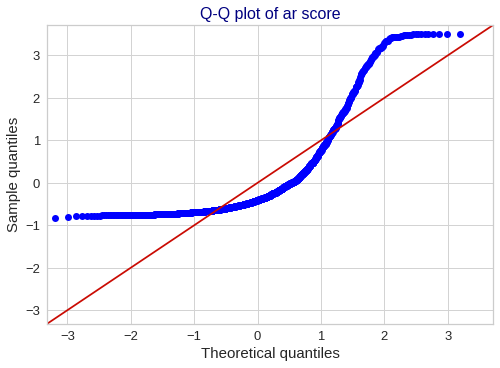

<Figure size 576x360 with 0 Axes>

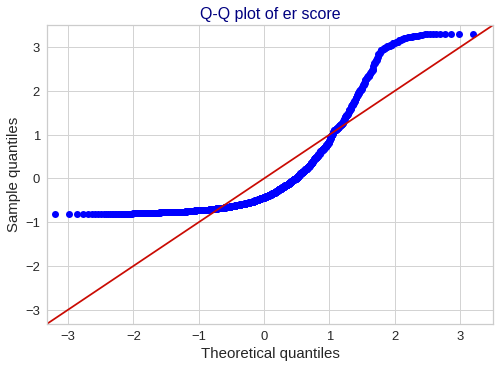

<Figure size 576x360 with 0 Axes>

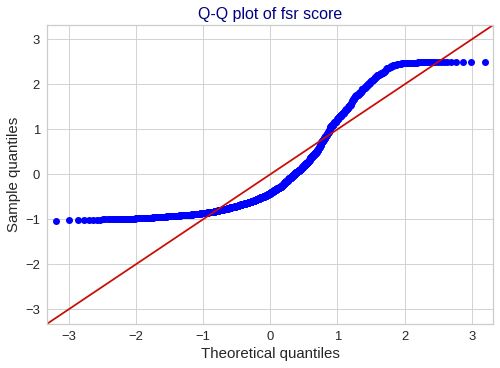

<Figure size 576x360 with 0 Axes>

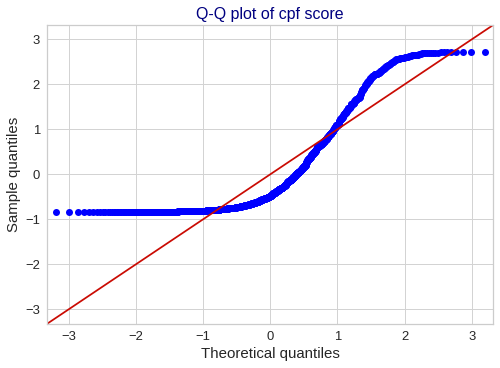

<Figure size 576x360 with 0 Axes>

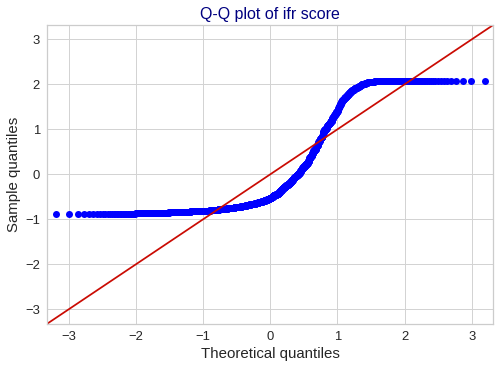

<Figure size 576x360 with 0 Axes>

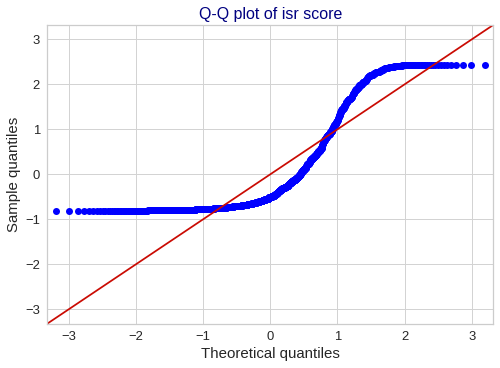

<Figure size 576x360 with 0 Axes>

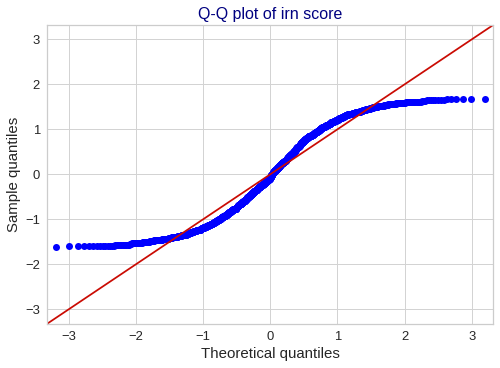

<Figure size 576x360 with 0 Axes>

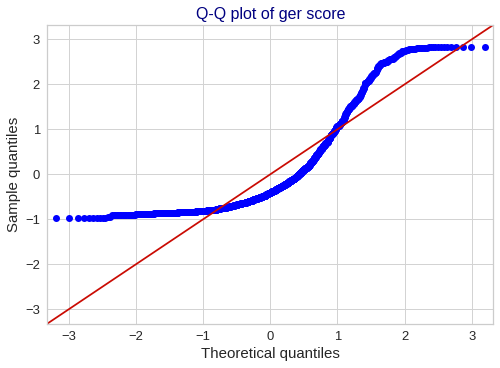

In [21]:
#checking the distribution of independent variables
from statsmodels.graphics.gofplots import qqplot

data_norm = newdata[['ar score', 'er score', 'fsr score', 'cpf score', 'ifr score', 'isr score', 'irn score', 'ger score']]
for c in data_norm.columns:
    fig = plt.figure(figsize=(8, 5))
    qqplot(data_norm[c], line='45', fit='True')
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.xlabel("Theoretical quantiles", fontsize=15)
    plt.ylabel("Sample quantiles", fontsize=15)
    plt.title("Q-Q plot of {}".format(c), fontsize=16, color='navy')
    plt.grid(True, color='lightgray')
    plt.show()

array([[<AxesSubplot:title={'center':'Rank'}>,
        <AxesSubplot:title={'center':'ar score'}>,
        <AxesSubplot:title={'center':'er score'}>],
       [<AxesSubplot:title={'center':'fsr score'}>,
        <AxesSubplot:title={'center':'cpf score'}>,
        <AxesSubplot:title={'center':'ifr score'}>],
       [<AxesSubplot:title={'center':'isr score'}>,
        <AxesSubplot:title={'center':'irn score'}>,
        <AxesSubplot:title={'center':'ger score'}>]], dtype=object)

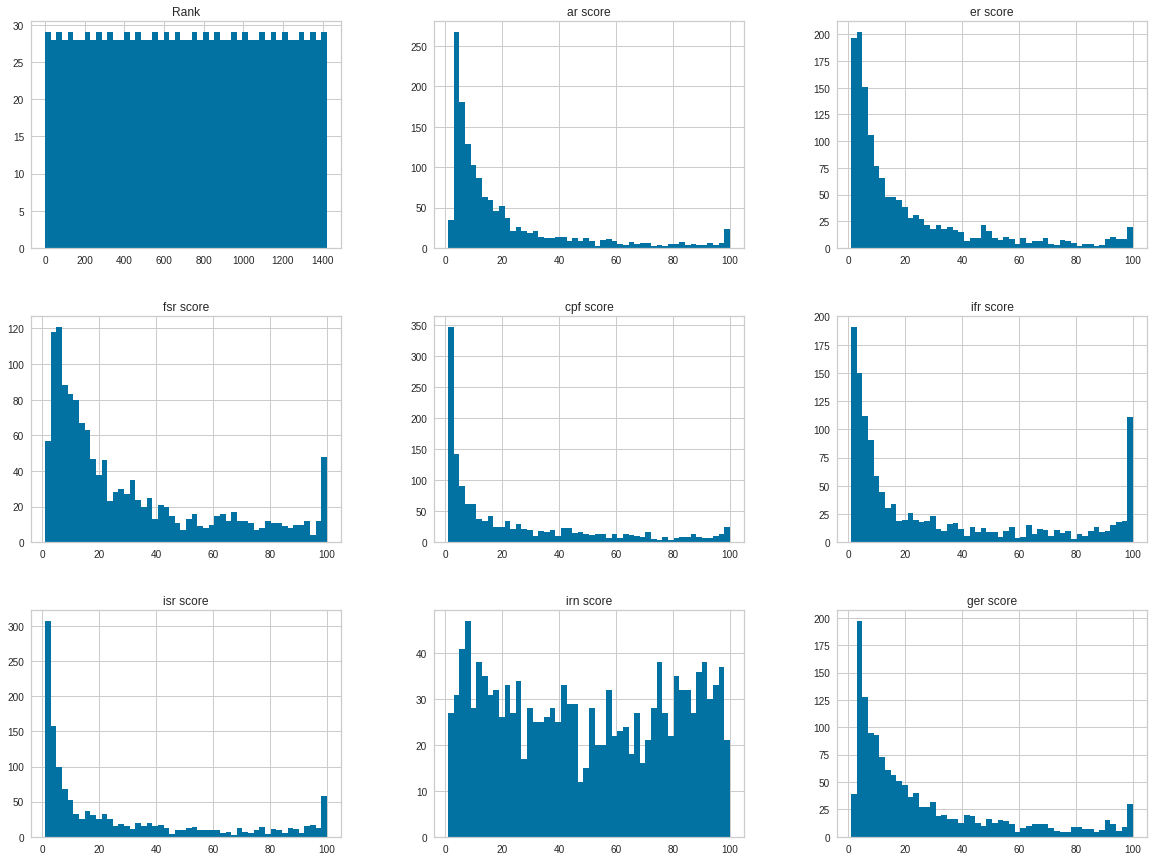

In [22]:
# Get only the numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Plot histograms for each numeric column
df[numeric_columns].hist(bins=50, figsize=(20,15))

#### **Interpreting the above plots:**

The distrubution followed by most of the scores comes out to be Right Skewed Distribution.
Although, they tend to become normally distributed with progression.
The distribution is as follows:

*   ar score, er score, fsr score, cpf score, ifr score, isr score & ger 
score: Right Skewed Distribution.
*   irn score: Normal Distribution



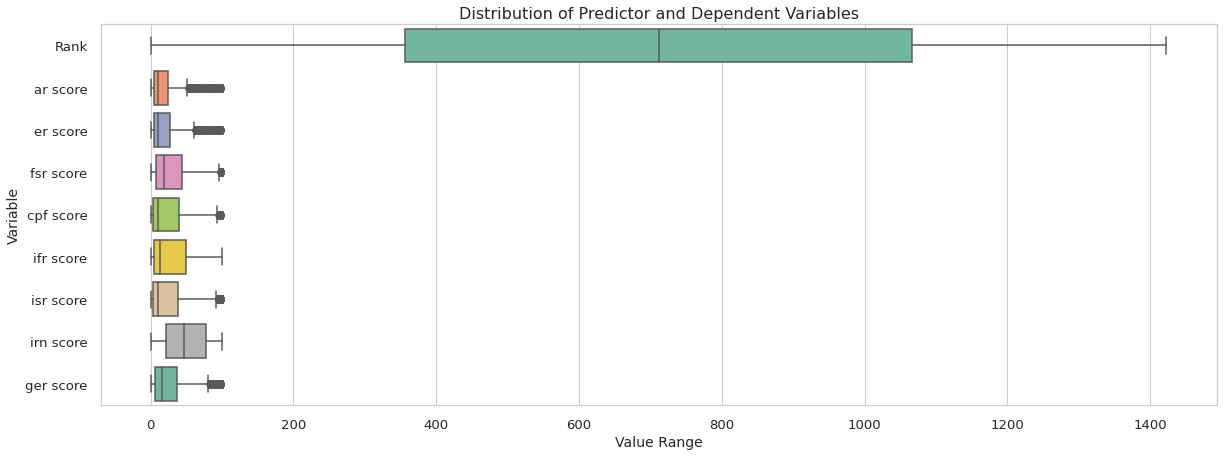

In [23]:
#Checking the Ranges of the predictor variables and dependent variable
plt.figure(figsize=(20,7))
sns.set(font_scale=1.2)
sns.set_style('whitegrid')
sns.boxplot(data=newdata, orient='h', palette='Set2')
plt.title('Distribution of Predictor and Dependent Variables', fontsize=16)
plt.xlabel('Value Range', fontsize=14)
plt.ylabel('Variable', fontsize=14)
plt.show()

In [24]:
#Range of each column
newdata.max() - newdata.min()
newdata.describe()

Rank     ar score     er score    fsr score    cpf score  \
count  1422.000000  1422.000000  1422.000000  1422.000000  1422.000000   
mean    711.500000    20.124684    20.650914    29.964937    24.460028   
std     410.640354    22.802706    24.020620    28.165843    27.886674   
min       1.000000     1.000000     1.000000     1.000000     1.000000   
25%     356.250000     5.400000     4.400000     8.200000     3.100000   
50%     711.500000    10.800000    10.300000    18.200000    10.950000   
75%    1066.750000    23.775000    26.950000    43.475000    39.200000   
max    1422.000000   100.000000   100.000000   100.000000   100.000000   

         ifr score    isr score    irn score    ger score  
count  1422.000000  1422.000000  1422.000000  1422.000000  
mean     30.331561    25.808776    49.399409    26.100647  
std      33.455492    30.542261    30.144495    26.117151  
min       1.000000     1.000000     1.000000     1.000000  
25%       4.800000     3.200000    21.625000     6.800000  
50%      12.640000    10.300000    47.000000    15.500000  
75%      49.075000    38.700000    77.375000    36.300000  
max     100.000000   100.000000   100.000000   100.000000

1.   As we can see, the distribution is either normal or tending to be normal in all variables except for rank. 
2.   The range for all of the scores ranges from 0 to 100.
3.   These score are independent/predictor variables hence the range is justified.
4.   The column rank is a consolidated dataset of 1422 universities which justifies its range from 1 to 1422. Hence we can see a uniform distribution for the same.

In [25]:
# Normalizing the data in the rank column beacuse the value is too high when compared to other independent variable

from sklearn import preprocessing

# Create x to store scaled values as floats
x = newdata[['Rank']].values.astype(float)

# Preparing for normalizing
min_max_scaler = preprocessing.MinMaxScaler()

# Transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
newdata[['Rank']] = pd.DataFrame(x_scaled)

In [26]:
newdata.head()

Rank  ar score  er score  fsr score  cpf score  ifr score  isr score  \
0  0.000000     100.0     100.0      100.0      100.0      100.0       90.0   
1  0.000704     100.0     100.0      100.0       92.3      100.0       96.3   
2  0.001407     100.0     100.0      100.0       99.9       99.8       60.3   
3  0.002111     100.0     100.0      100.0       90.0       98.8       98.4   
4  0.002815     100.0     100.0       99.4      100.0       76.9       66.9   

   irn score  ger score  
0       96.1      100.0  
1       99.5      100.0  
2       96.3      100.0  
3       99.9      100.0  
4      100.0      100.0

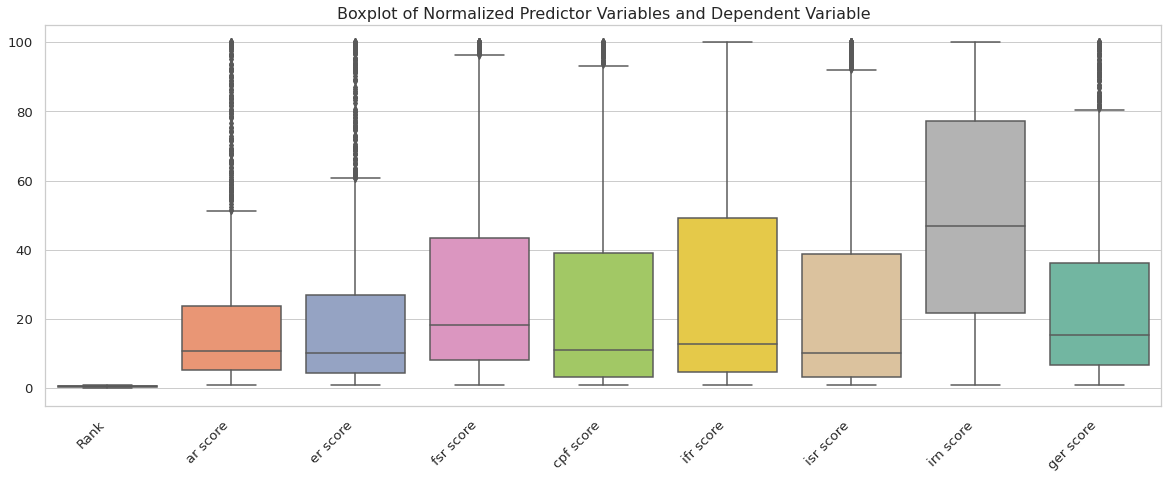

In [27]:
#Checking the Ranges of the predictor variables and dependent variable after normalizing
plt.figure(figsize=(20,7))
sns.set(font_scale=1.2)
sns.set_style('whitegrid')
sns.boxplot(data=newdata, palette='Set2')
plt.title('Boxplot of Normalized Predictor Variables and Dependent Variable', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.show()

In [28]:
newdata.corr()

Rank  ar score  er score  fsr score  cpf score  ifr score  \
Rank       1.000000 -0.736358 -0.660940  -0.580807  -0.659282  -0.572367   
ar score  -0.736358  1.000000  0.842919   0.374992   0.558307   0.415630   
er score  -0.660940  0.842919  1.000000   0.342738   0.429492   0.370071   
fsr score -0.580807  0.374992  0.342738   1.000000   0.118821   0.179997   
cpf score -0.659282  0.558307  0.429492   0.118821   1.000000   0.445985   
ifr score -0.572367  0.415630  0.370071   0.179997   0.445985   1.000000   
isr score -0.535034  0.406949  0.372894   0.235483   0.362950   0.719588   
irn score -0.639821  0.616660  0.425420   0.167764   0.594143   0.414264   
ger score -0.475526  0.563289  0.576776   0.291551   0.361509   0.330870   

           isr score  irn score  ger score  
Rank       -0.535034  -0.639821  -0.475526  
ar score    0.406949   0.616660   0.563289  
er score    0.372894   0.425420   0.576776  
fsr score   0.235483   0.167764   0.291551  
cpf score   0.362950   0.594143   0.361509  
ifr score   0.719588   0.414264   0.330870  
isr score   1.000000   0.371316   0.311141  
irn score   0.371316   1.000000   0.262862  
ger score   0.311141   0.262862   1.000000

#### **Heat Map**

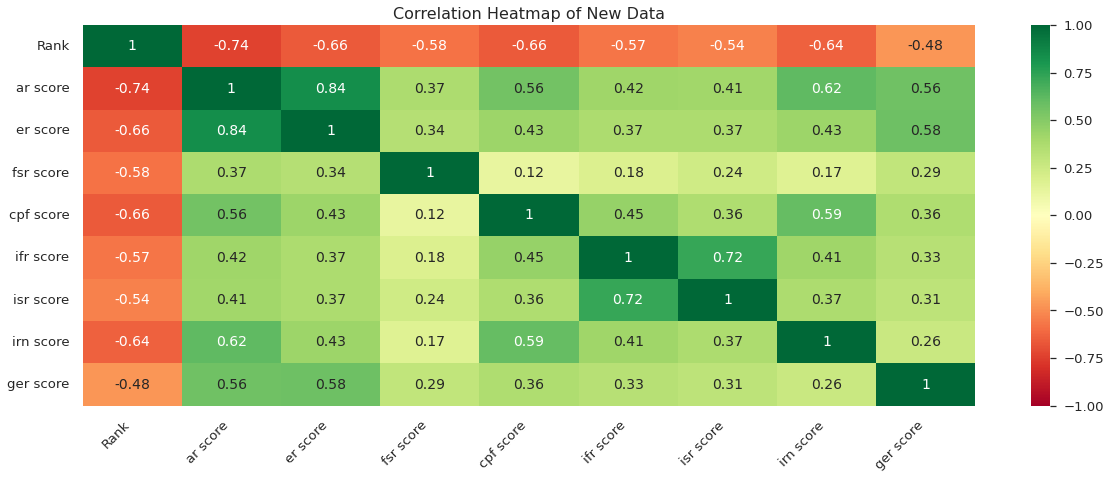

In [29]:
plt.figure(figsize=(20,7))
sns.set(font_scale=1.2)
sns.set_style('whitegrid')
sns.heatmap(newdata.corr(), annot=True, cmap='RdYlGn', vmin=-1, vmax=1, annot_kws={"size": 14})
plt.title('Correlation Heatmap of New Data', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.show()

#### **Correlation Analysis**

Above is a graphical representation of the correlation between different features in the dataset. The heatmap displays a matrix of colors that represent the strength of the correlation between pairs of variables.

We can calculate the correlation between pairs of variables using a correlation coefficient, such as the Pearson correlation coefficient. This coefficient measures the linear relationship between two variables, with values ranging from -1 (perfect negative correlation) to 1 (perfect positive correlation). A value of 0 indicates no correlation.

The above heatmap displays the correlation coefficients as colors in a matrix, with each variable plotted both on the x and y axis. The color of each cell in the matrix indicates the strength of the correlation between the corresponding pair of variables, with a color scale ranging from low (e.g. light green) to high (e.g. dark green).

A correlation heatmap can help you identify the relationships between pairs of variables in a dataset. You can use it to spot patterns and trends, and to identify variables that are strongly correlated (either positively or negatively). This information can be useful for exploratory data analysis and for identifying potential predictors in statistical models.


***From the above matrix we can conclude a few things:***

* ar score and er score are highly correlated.
* ifr score and isr score are highly correlated.

#### **PairPlot**

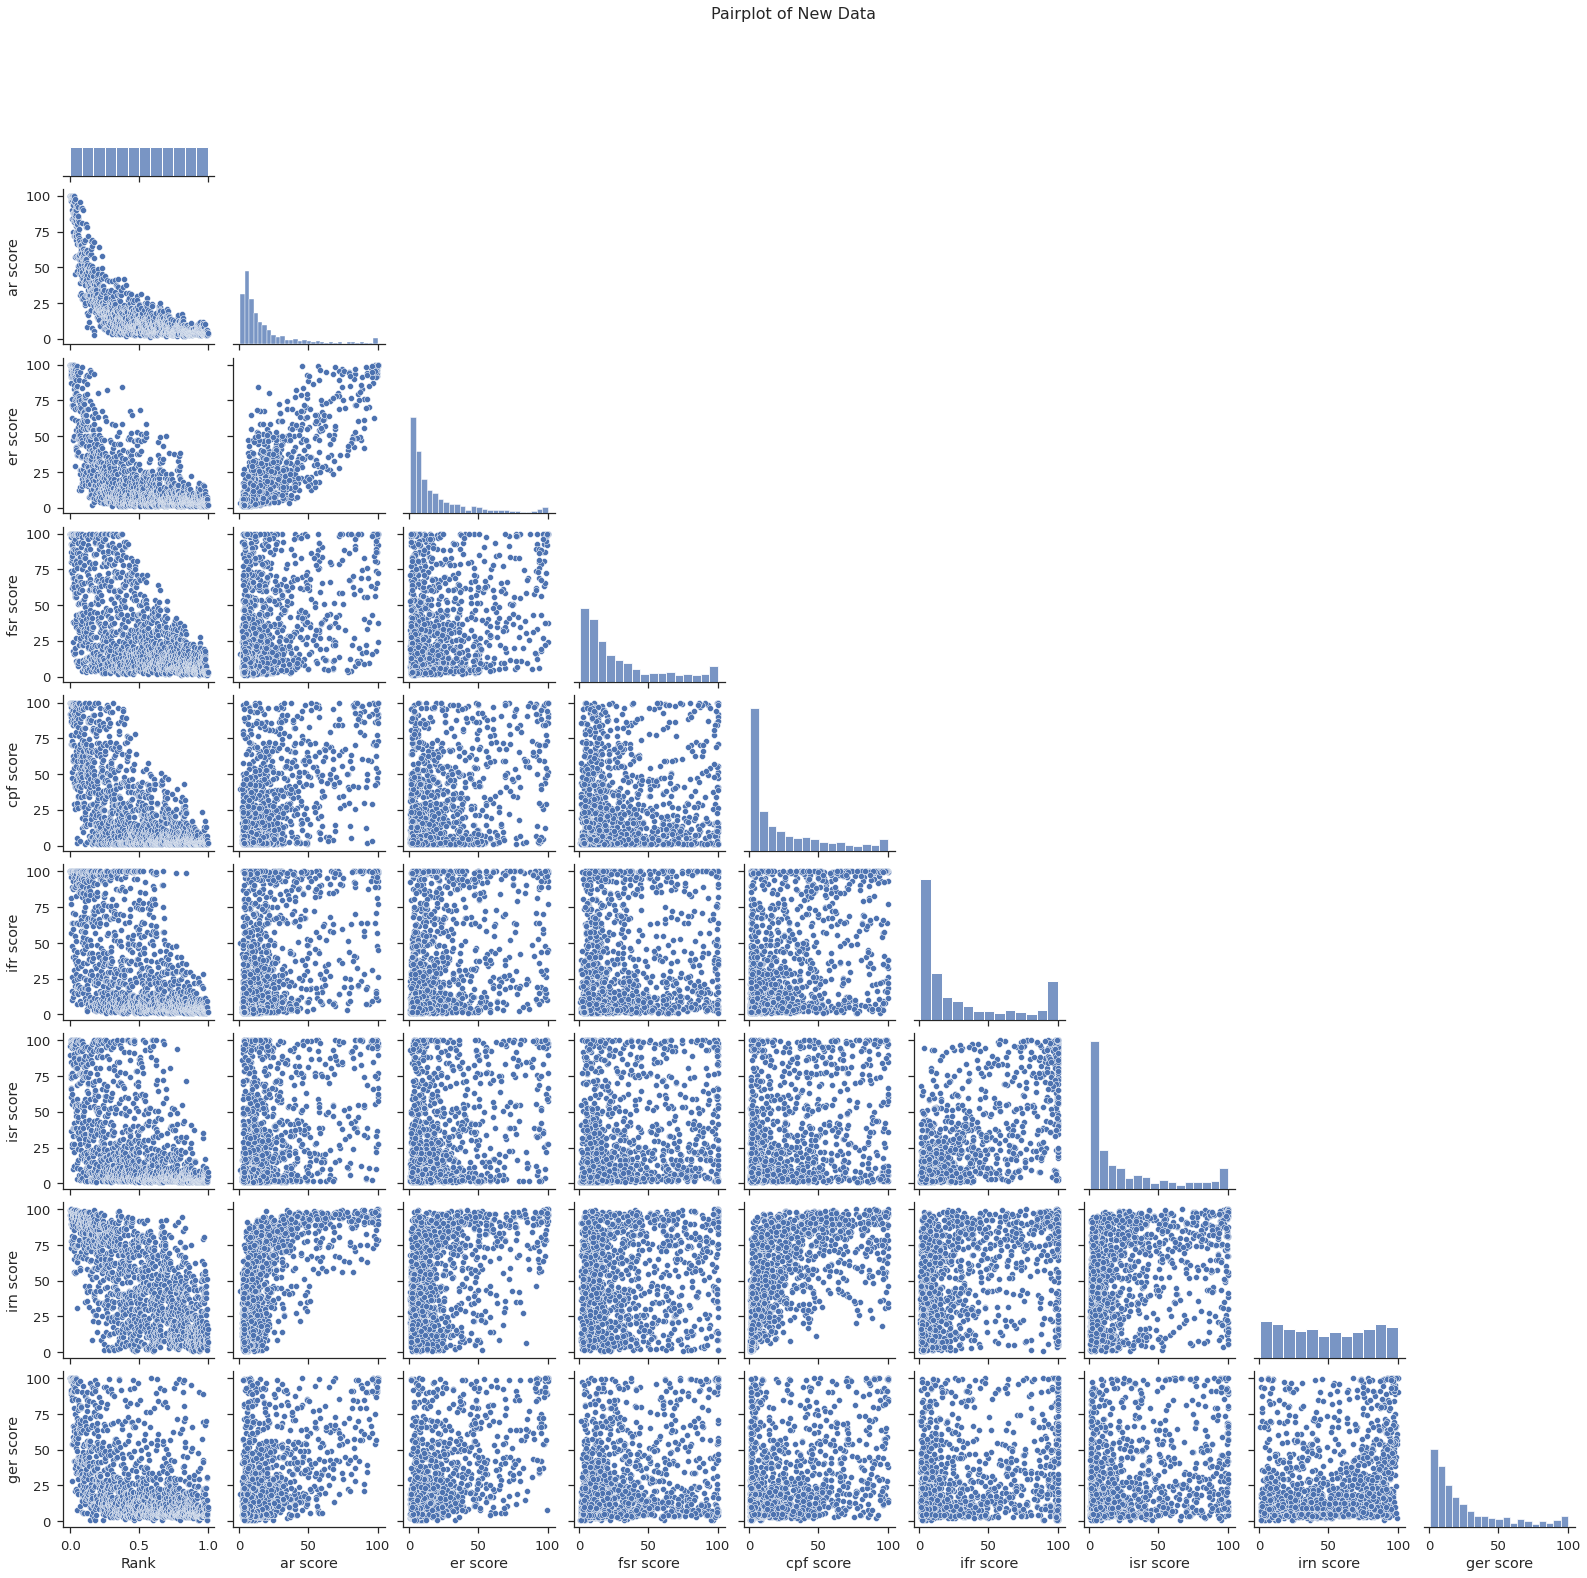

In [30]:
sns.set(style='ticks', font_scale=1.2)

# Pairplot
plot = sns.pairplot(newdata, diag_kind='hist', corner=True, x_vars=newdata.columns, y_vars=newdata.columns)
plot.fig.suptitle('Pairplot of New Data', fontsize=16)

# Adjust plot layout
plot.tight_layout()

# Show plot
plt.show()

#### **AutoML H2O**

In [31]:
# Initializing H2O cluster
h2o.init()

# Converting pandas dataframe to H2O dataframe
h2o_df = h2o.H2OFrame(df)  

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.17" 2022-10-18; OpenJDK Runtime Environment (build 11.0.17+8-post-Ubuntu-1ubuntu220.04); OpenJDK 64-Bit Server VM (build 11.0.17+8-post-Ubuntu-1ubuntu220.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.8/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpa9om120z
  JVM stdout: /tmp/tmpa9om120z/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpa9om120z/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  ----------------------------------
H2O_cluster_uptime:         03 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.40.0.1
H2O_cluster_version_age:    20 days
H2O_cluster_name:           H2O_from_python_unknownUser_t307jx
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.172 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.8.10 final
--------------------------  ----------------------------------

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [32]:
# Checking for datatypes
df.dtypes

Rank           int64
ar score     float64
er score     float64
fsr score    float64
cpf score    float64
ifr score    float64
isr score    float64
irn score    float64
ger score    float64
dtype: object

In [33]:
# Setting up the data split between training and test dataset.
pct_rows = 0.80  

# Splitting the data into training and testing sets
df_train, df_test = h2o_df.split_frame([pct_rows])  

In [34]:
# Printing the shape of the training and test data
print("Training data shape: ", df_train.shape)
print("Test data shape: ", df_test.shape)

Training data shape:  (1150, 9)
Test data shape:  (272, 9)


In [35]:
df_train.head()


Rank    ar score    er score    fsr score    cpf score    ifr score    isr score    irn score    ger score
------  ----------  ----------  -----------  -----------  -----------  -----------  -----------  -----------
     1       100         100          100          100          100           90           96.1        100
     2       100         100          100           92.3        100           96.3         99.5        100
     4       100         100          100           90           98.8         98.4         99.9        100
     5       100         100           99.4        100           76.9         66.9        100          100
     6        96.5        87.1        100          100           99.8         85.1         73           98.8
     7        98.3        99.7         99.5         86.5        100          100           98.1         88.8
     8        99.4        98.6         97.6         77           99.2        100          100           90.3
     9        98.6        91.3         74.2         99.2        100           98           96.2         91.1
    11        99.5        94.1         79.8         91.8        100           73.5         89.9         99.6
    12        99.3        96.5         87.3         96.7         57.1         36.9         77.5         91.4
[10 rows x 9 columns]

In [36]:
# Conversion to list
X = df.columns.tolist()

In [37]:
print(X)

['Rank', 'ar score', 'er score', 'fsr score', 'cpf score', 'ifr score', 'isr score', 'irn score', 'ger score']


In [38]:
y = 'Rank'

In [39]:
X.remove(y)

In [40]:
print(y)

Rank


In [41]:
# Setting of AutoML
aml = H2OAutoML(max_runtime_secs=run_time, seed=1)  

In [42]:
# Training the dataset on different models
aml.train(x=X, y=y, training_frame=df_train)  

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_3_AutoML_1_20230301_42230


Model Summary for Stacked Ensemble: 
key                                        value
-----------------------------------------  ----------------
Stacking strategy                          cross_validation
Number of base models (used / total)       16/65
# GBM base models (used / total)           6/24
# XGBoost base models (used / total)       6/34
# DRF base models (used / total)           0/2
# DeepLearning base models (used / total)  4/4
# GLM base models (used / total)           0/1
Metalearner algorithm                      GLM
Metalearner fold assignment scheme         Random
Metalearner nfolds                         5
Metalearner fold_column
Custom metalearner hyperparameters         None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 758.200253944014
RMSE: 27.53543633109913
MAE: 20.053751634617395
RMSLE: NaN
Mean Residual Deviance: 758.200253944014
R^2: 0.9954983797343051
Null degrees of freedom: 1149
Residual degrees of freedom: 1133
Null deviance: 193692546.36608687
Residual deviance: 871930.2920356161
AIC: 10925.148295084886

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 3665.5008725621315
RMSE: 60.543380088678
MAE: 42.79472385410153
RMSLE: NaN
Mean Residual Deviance: 3665.5008725621315
R^2: 0.9782370252106691
Null degrees of freedom: 1149
Residual degrees of freedom: 1134
Null deviance: 193973198.32627672
Residual deviance: 4215326.003446451
AIC: 12735.28693538822

Cross-Validation Metrics Summary: 
                        mean         sd           cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  -----------  -----------  ------------  ------------  ------------  ------------  ------------
mae                     42.7609      5.43706      44.651        33.5095       47.0654       46.0046       42.5741
mean_residual_deviance  3659.89      847.077      4087.34       2321.69       4485.47       4027.64       3377.31
mse                     3659.89      847.077      4087.34       2321.69       4485.47       4027.64       3377.31
null_deviance           3.87946e+07  2.25868e+06  3.94649e+07   4.23671e+07   3.69759e+07   3.82716e+07   3.68937e+07
r2                      0.977991     0.00579627   0.975661      0.987385      0.972273      0.975431      0.979204
residual_deviance       843065       200548       960525        527024        1.02269e+06   938440        766650
rmse                    60.1336      7.4023       63.9323       48.1839       66.9736       63.4637       58.1147
rmsle                   nan          0            nan           nan           nan           nan           nan

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

**Insights:**
* The Stacked Ensemble model achieved a high R^2 value of 0.9946 on the training data, indicating a good fit to the data.
* However, on the cross-validation data, the model's performance was not as strong, with a higher RMSE of 60.93 and lower R^2 value of 0.9779, suggesting potential overfitting.

#### **Training and Testing - Plot**

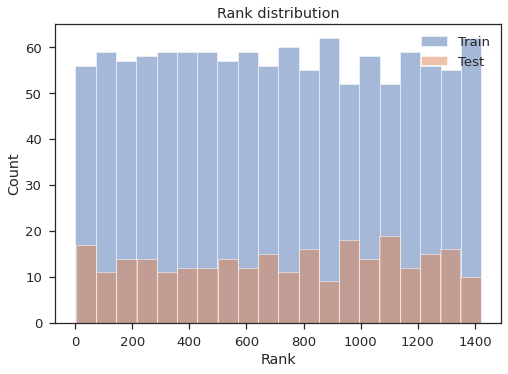

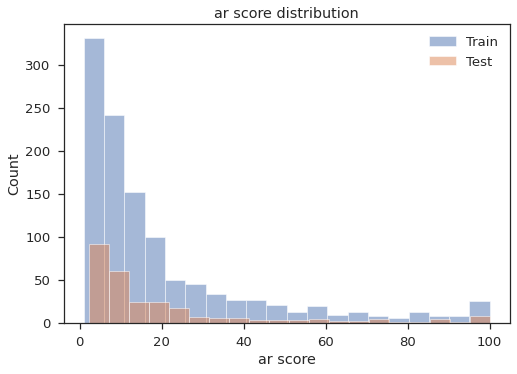

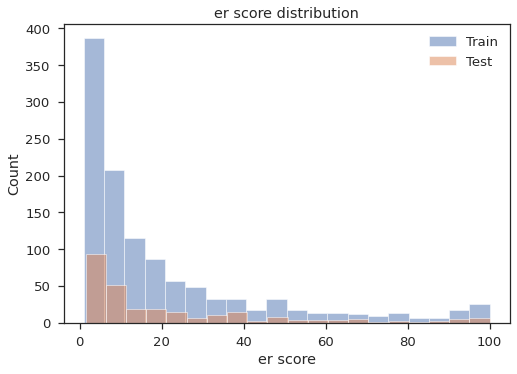

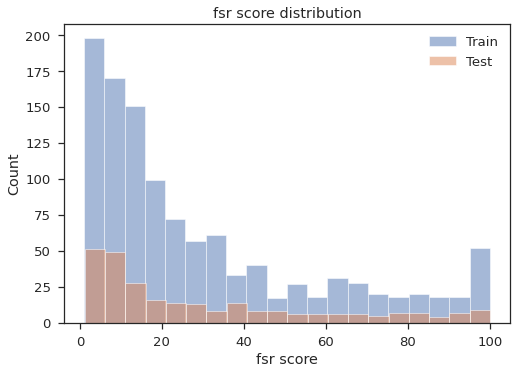

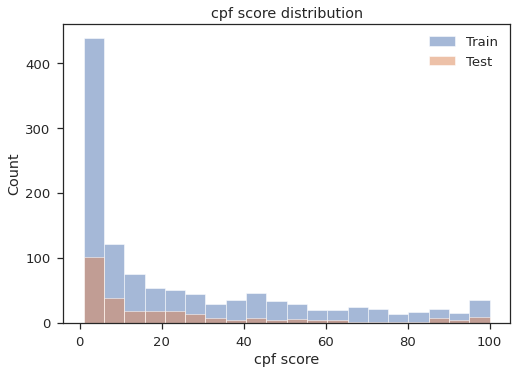

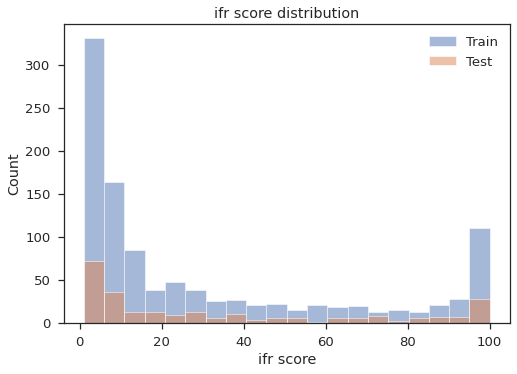

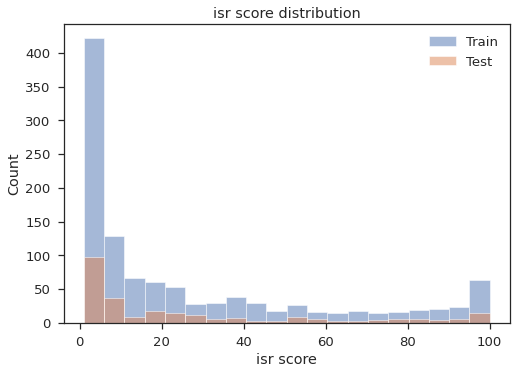

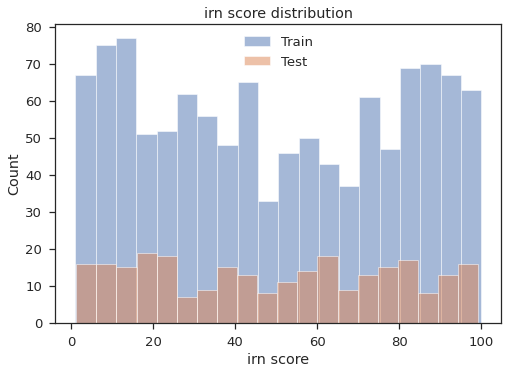

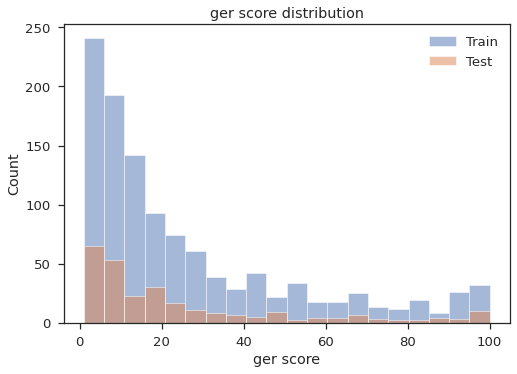

In [43]:
def plot_histogram(df_train, df_test, column):
    # Setting the number of bins for the histogram
    bins = 20
    
    # Plotting the histograms for train and test data frames
    plt.hist( df_train[column].as_data_frame().values.flatten(), bins=bins, alpha=0.5, label='Train')
    plt.hist(df_test[column].as_data_frame().values.flatten(), bins=bins, alpha=0.5, label='Test')
    plt.title(column + ' distribution')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend()
    plt.show()

# Plotting histograms for train and test data frames
for column in df_train.columns:
    plot_histogram(df_train, df_test, column)


In [44]:
print(aml.leaderboard)

model_id                                                   rmse      mse      mae       rmsle    mean_residual_deviance
StackedEnsemble_AllModels_3_AutoML_1_20230301_42230     60.5434  3665.5   42.7947  nan                          3665.5
StackedEnsemble_AllModels_2_AutoML_1_20230301_42230     61.7405  3811.88  44.75    nan                          3811.88
StackedEnsemble_AllModels_1_AutoML_1_20230301_42230     62.686   3929.54  45.3158  nan                          3929.54
StackedEnsemble_BestOfFamily_4_AutoML_1_20230301_42230  62.807   3944.72  45.27    nan                          3944.72
StackedEnsemble_BestOfFamily_3_AutoML_1_20230301_42230  63.8115  4071.91  46.5409  nan                          4071.91
StackedEnsemble_BestOfFamily_2_AutoML_1_20230301_42230  64.9597  4219.77  47.1021  nan                          4219.77
GBM_4_AutoML_1_20230301_42230                           66.0999  4369.2   48.1297    0.122592                   4369.2
GBM_2_AutoML_1_20230301_42230             

***Based on their rmse scores, the models included in the leaderboard are ordered, with a lower score indicating greater performance. The model with the lowest rmse score is shown in the top row of the scoreboard. The performance of various models can be compared using the evaluation metrics, which can then be used to choose the optimal model for a certain use case.***

**The model with the best performance on this leaderboard is:**
* The StackedEnsemble_BestOfFamily_4 model has the lowest RMSE of 60.9253.
* The StackedEnsemble models perform better than the GBM models.
* The difference in performance between the StackedEnsemble models is small, with the top four models having an RMSE within 2.5 points of each other.

#### **Actual vs Predicted Values**

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


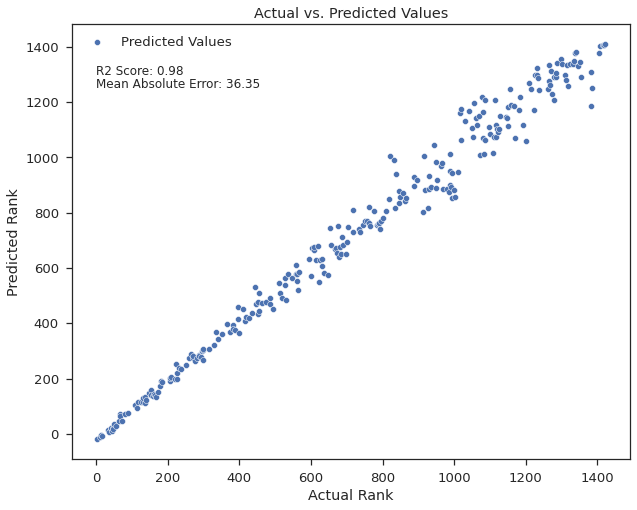

In [45]:
# Plotting actual vs. predicted values
y_pred = aml.predict(df_test).as_data_frame()['predict']
y_test = df_test[y].as_data_frame()['Rank']
plt.figure(figsize=(10,8))
sns.scatterplot(x=y_test, y=y_pred)
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Rank')
plt.ylabel('Predicted Rank')
plt.legend(['Predicted Values'])
plt.text(0, 1300, f'R2 Score: {r2_score(y_test, y_pred):.2f}', fontsize=12)
plt.text(0, 1250, f'Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.2f}', fontsize=12)
plt.show()


In [46]:
model_index = 0
glm_index = 0
glm_model = ""
aml_leaderboard_df = aml.leaderboard.as_data_frame()
models_dict = {}
for m in aml_leaderboard_df["model_id"]:
    models_dict[m] = model_index
    if "StackedEnsemble" not in m:
        break
    model_index = model_index + 1

for m in aml_leaderboard_df["model_id"]:
    if "GLM" in m:
        models_dict[m] = glm_index
        break
    glm_index = glm_index + 1
models_dict

{'StackedEnsemble_AllModels_3_AutoML_1_20230301_42230': 0,
 'StackedEnsemble_AllModels_2_AutoML_1_20230301_42230': 1,
 'StackedEnsemble_AllModels_1_AutoML_1_20230301_42230': 2,
 'StackedEnsemble_BestOfFamily_4_AutoML_1_20230301_42230': 3,
 'StackedEnsemble_BestOfFamily_3_AutoML_1_20230301_42230': 4,
 'StackedEnsemble_BestOfFamily_2_AutoML_1_20230301_42230': 5,
 'GBM_4_AutoML_1_20230301_42230': 6,
 'GLM_1_AutoML_1_20230301_42230': 66}

In [47]:
print(model_index)
best_model = h2o.get_model(aml.leaderboard[model_index, "model_id"])

6


In [48]:
best_model.algo

'gbm'

*The best performing model among all the trained models is a Gradient Boosting Machine (GBM) algorithm.*

#### **Explainability**

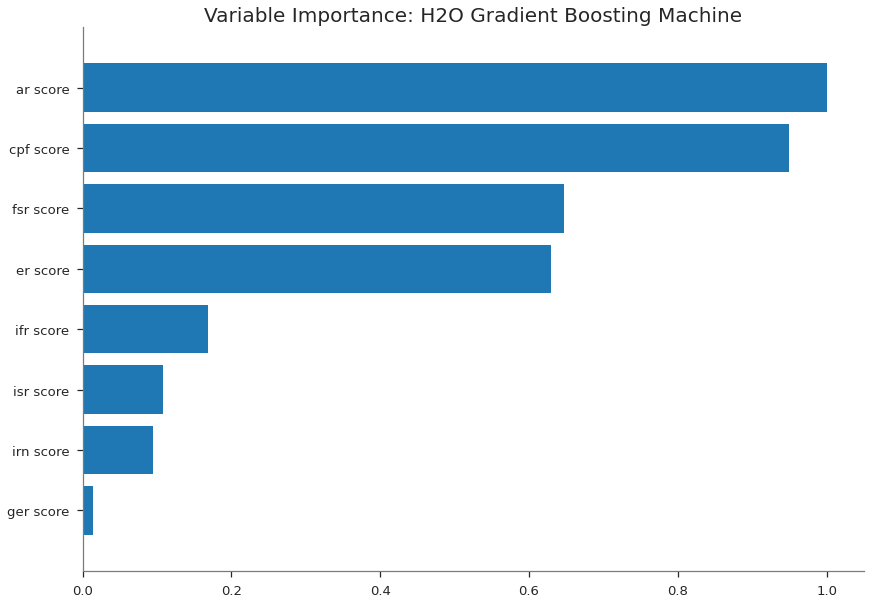

<Figure size 576x396 with 0 Axes>

In [49]:
if best_model.algo in [
    "gbm",
    "drf",
    "xrt",
    "xgboost",
]:  # Importance of all the variables in GBM algorithm.
    best_model.varimp_plot()


***Inference for the above plot:***

The graph on top represents the Distributed Random Forest Model for H20's variable Importance.

* We can infer that, out of all the variables, ar score is the most significant, with a significance of 1.0 (as if this significance were scaled to 100%). Also, fsr score is the next one holding significance.

GLM model found at index 66 of the AutoML leaderboard
Algorithm: GLM



<Figure size 720x576 with 0 Axes>

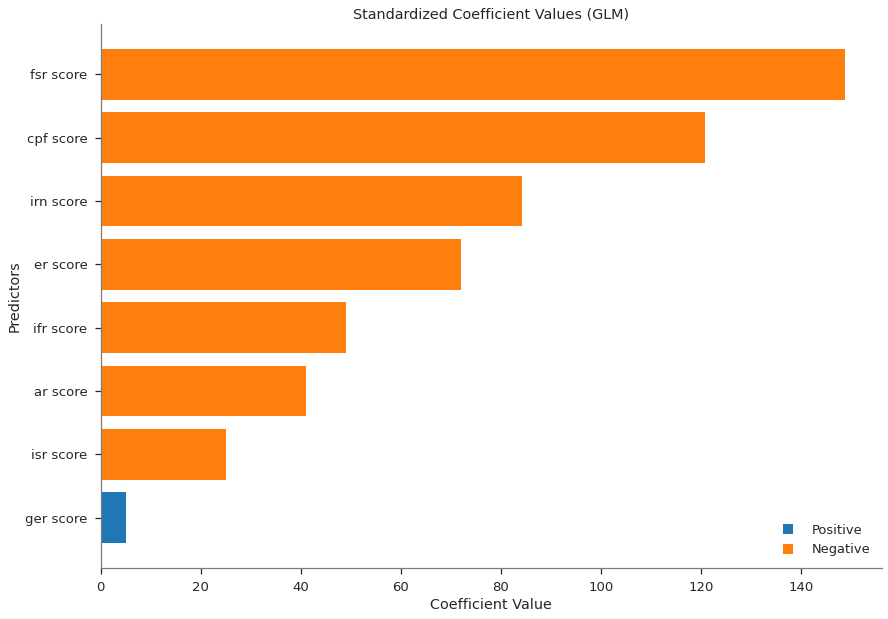

In [50]:
if glm_index != 0:
    print(f"GLM model found at index {glm_index} of the AutoML leaderboard")
    glm_model = h2o.get_model(aml.leaderboard[glm_index, "model_id"])
    print(f"Algorithm: {glm_model.algo.upper()}\n")
    plt.figure(figsize=(10, 8))
    glm_model.std_coef_plot()
    plt.title(f"Standardized Coefficient Values ({glm_model.algo.upper()})")
    plt.xlabel("Coefficient Value")
    plt.ylabel("Predictors")
    plt.show()


***Keynote:***

By standardizing all variables to have a mean of zero and a standard deviation of one, standardized coefficient magnitudes (also known as standardized coefficients or beta coefficients) are a measurement of the significance of each input variable in a predictive model. Standardized coefficient magnitudes are typically expressed as percentages, but their values can vary from -infinity to infinity.

After taking into consideration the scale of the variable, the values on the standardized coefficient magnitudes indicate the relative significance of each input variable in the model. A bigger impact on the outcome variable is indicated by a higher magnitude value, whilst a lesser effect is indicated by a lower value.


In [51]:
print(best_model.rmse(train=True))


21.2910779415041


In [52]:
# Function to gather stats of the model
def model_performance_stats(perf):
    d = {}
    try:
        d["mse"] = perf.mse()
    except:
        pass
    try:
        d["rmse"] = perf.rmse()
    except:
        pass
    try:
        d["null_degrees_of_freedom"] = perf.null_degrees_of_freedom()
    except:
        pass
    try:
        d["residual_degrees_of_freedom"] = perf.residual_degrees_of_freedom()
    except:
        pass
    try:
        d["residual_deviance"] = perf.residual_deviance()
    except:
        pass
    try:
        d["null_deviance"] = perf.null_deviance()
    except:
        pass
    try:
        d["aic"] = perf.aic()
    except:
        pass
    try:
        d["logloss"] = perf.logloss()
    except:
        pass
    try:
        d["auc"] = perf.auc()
    except:
        pass
    try:
        d["gini"] = perf.gini()
    except:
        pass
    return d

In [53]:
# Calculating the performance statistics of the best model on a test dataset
mod_perf = best_model.model_performance(df_test)
stats_test = {}
stats_test = model_performance_stats(mod_perf)
stats_test

{'mse': 3544.615434230949,
 'rmse': 59.53667301950075,
 'null_degrees_of_freedom': None,
 'residual_degrees_of_freedom': None,
 'residual_deviance': None,
 'null_deviance': None}

#### ***Model Performance Metrics - Plot***

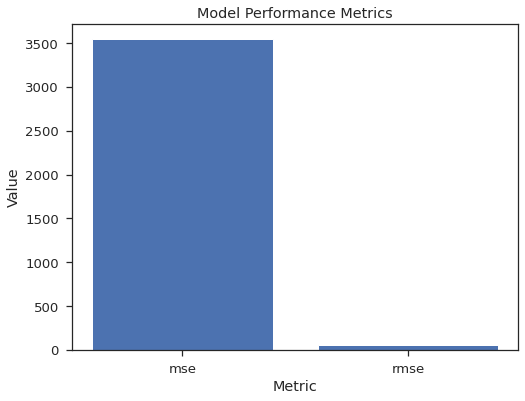

In [54]:
# Getting performance stats
mod_perf = best_model.model_performance(df_test)
stats_test = model_performance_stats(mod_perf)

# Removing missing values from dictionary
stats_test = {k: v for k, v in stats_test.items() if v is not None}

# Creating bar plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(stats_test.keys(), stats_test.values())
ax.set_title('Model Performance Metrics')
ax.set_ylabel('Value')
ax.set_xlabel('Metric')
plt.show()

In [55]:
predictions = best_model.predict(df_test)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [56]:
# Predictions on Test Dataset using the best model from the leaderboard.
y_pred = h2o.as_list(
    predictions
)  
print(y_pred)

         predict
0       4.015249
1      12.274963
2      14.111118
3      14.852161
4      36.410353
..           ...
267  1364.326496
268  1376.576642
269  1383.821715
270  1386.983265
271  1402.429782

[272 rows x 1 columns]


In [57]:
# Real Answers
y_test = h2o.as_list(df_test[y]) 
y_test

Rank
0       3
1      10
2      14
3      17
4      33
..    ...
267  1403
268  1408
269  1416
270  1417
271  1420

[272 rows x 1 columns]

In [58]:
print(X)

['ar score', 'er score', 'fsr score', 'cpf score', 'ifr score', 'isr score', 'irn score', 'ger score']


#### **Regularization**

*In this section, we will explore the concept of regularization in the context of linear regression using the GLM model. Regularization techniques, such as Ridge and Lasso, are used to prevent overfitting and improve the model's generalization ability.*

* Ridge regularization works by adding a penalty term to the least-squares objective function of the linear regression model. The penalty term is proportional to the square of the magnitude of the coefficients of the model, which helps to shrink the coefficients towards zero. The regularization strength is controlled by a hyperparameter, which must be tuned to achieve the best performance. Ridge regularization is particularly useful when there are many input variables that are correlated with each other, as it can help to reduce the variance of the model by reducing the effect of these correlated variables.

* Lasso regularization, on the other hand, adds a penalty term proportional to the absolute value of the coefficients. This penalty term can set some coefficients to exactly zero, making Lasso regularization an effective method for feature selection. By removing irrelevant variables from the model, Lasso can simplify and make the model more interpretable. The main difference between Ridge and Lasso regularization is the type of penalty function used. L2 regularization distributes the penalty evenly across all coefficients, while L1 regularization concentrates the penalty on a smaller subset of the most important coefficients. The choice of regularization method depends on the specific problem and the properties of the input variables.

In summary, regularization techniques like Ridge and Lasso are powerful tools for improving the accuracy and generalization ability of linear regression models. By controlling the regularization strength, we can balance the tradeoff between bias and variance in the model and prevent overfitting. Ridge regularization can reduce the effect of correlated input variables, while Lasso regularization can effectively perform feature selection and simplify the model. The choice of regularization method depends on the specific problem and the characteristics of the input variables.






In [59]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

# Creating a H2OGeneralizedLinearEstimator object for each type of regularization
# Elastic Net Regularization
ranking_glm = H2OGeneralizedLinearEstimator(
    family="gaussian", lambda_=0, compute_p_values=True, nfolds=5
)
# RIDGE Regularization
ranking_glm_regularization_ridge = H2OGeneralizedLinearEstimator(
    family="gaussian", alpha=0, nfolds=5
)
# LASSO Regularization
ranking_glm_regularization_lasso = H2OGeneralizedLinearEstimator(
    family="gaussian", alpha=1, nfolds=5
)
# Lambda Search
ranking_glm_regularization_lamba_search = H2OGeneralizedLinearEstimator(
    lambda_search=True
)

**Inference:**

The code is creating three H2OGeneralizedLinearEstimator objects with different regularization methods: Elastic Net, Ridge, and Lasso.
* The first object, "ranking_glm," is using Elastic Net regularization with lambda set to 0 and 5-fold cross-validation.
* The second object, "ranking_glm_regularization_ridge," is using Ridge regularization with alpha set to 0 and 5-fold cross-validation.
* The third object, "ranking_glm_regularization_lasso," is using Lasso regularization with alpha set to 1 and 5-fold cross-validation.
* The code also includes an additional H2OGeneralizedLinearEstimator object, "ranking_glm_regularization_lamba_search," which enables lambda search for L1 and L2 regularization.

In [60]:
# Training a generalized linear regression model using H2O
ranking_glm.train(x=X, y=y, training_frame=df_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1677644540110_25


GLM Model: summary
    family    link      regularization    number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ----------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  None              8                             8                              1                       py_2_sid_84c5

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 30681.132811720592
RMSE: 175.16030603912688
MAE: 141.48490514102593
RMSLE: NaN
Mean Residual Deviance: 30681.132811720592
R^2: 0.8178386138473713
Null degrees of freedom: 1149
Residual degrees of freedom: 1141
Null deviance: 193692546.36608687
Residual deviance: 35283302.73347868
AIC: 15164.672281368008

ModelMetricsRegressionGLM: glm
** Reported on cross-validation data. **

MSE: 31342.284099512035
RMSE: 177.03752172777396
MAE: 143.0154617967309
RMSLE: NaN
Mean Residual Deviance: 31342.284099512035
R^2: 0.8139131970193891
Null degrees of freedom: 1149
Residual degrees of freedom: 1141
Null deviance: 193755851.94779336
Residual deviance: 36043626.71443884
AIC: 15189.190530092414

Cross-Validation Metrics Summary: 
                        mean         sd           cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  -----------  -----------  ------------  ------------  ------------  ------------  ------------
mae                     142.941      8.61124      135.158       144.122       138.994       157.254       139.175
mean_residual_deviance  31272.3      3999.41      26563.6       32354.9       31533.6       37132.5       28777
mse                     31272.3      3999.41      26563.6       32354.9       31533.6       37132.5       28777
null_deviance           3.87512e+07  1.49995e+06  3.70427e+07   4.10232e+07   3.92506e+07   3.79917e+07   3.84475e+07
r2                      0.813987     0.0262035    0.845102      0.810497      0.808783      0.775502      0.830049
residual_deviance       7.20873e+06  1.08337e+06  5.73773e+06   7.76517e+06   7.505e+06     8.50335e+06   6.53238e+06
rmse                    176.554      11.2327      162.983       179.875       177.577       192.698       169.638
rmsle                   nan          0            nan           nan           nan           nan           nan

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective           training_rmse       training_deviance    training_mae        training_r2
--  -------------------  ----------  ------------  -------------------------  ------------------  ------------------  -------------------  ------------------  ------------------
    2023-03-01 04:26:24  0.000 sec   0             193692546.36608702         168428.30118790176
    2023-03-01 04:26:24  0.009 sec   1                                                            175.16030603912688  30681.132811720592   141.48490514102593  0.8178386138473713

Variable Importances: 
variable    relative_importance    scaled_importance    percentage
----------  ---------------------  -------------------  ------------
fsr score   154.258                1                    0.276151
cpf score   125.602                0.814232             0.224851
irn score   86.3153                0.55955              0.15452
er score    77.9247                0.505157             0.1395
ifr score   49.6909                0.322128             0.0889558
ar score    33.4807                0.217043             0.0599365
isr score   23.469                 0.152141             0.0420137
ger score   7.86117                0.050961             0.0140729

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

#### **Feature Importance Plot**

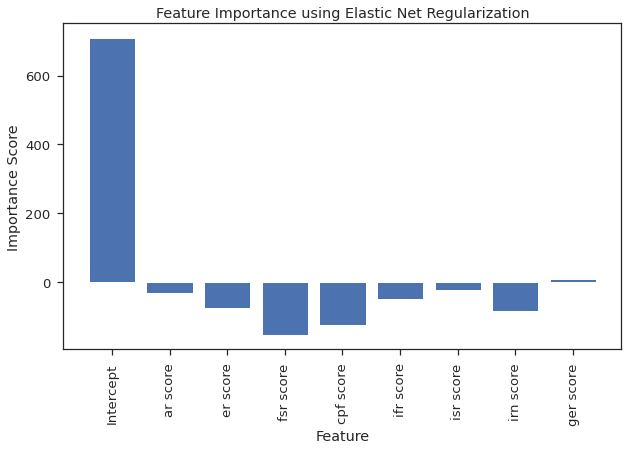

In [61]:
# Getting the feature importance
feature_importance = ranking_glm.coef_norm()
feature_names = list(feature_importance.keys())
feature_scores = list(feature_importance.values())

# Plotting the feature importance
plt.figure(figsize=(10,6))
plt.bar(feature_names, feature_scores)
plt.title("Feature Importance using Elastic Net Regularization")
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.xticks(rotation=90)
plt.show()

***The height of each bar represents the importance score of the corresponding feature, with higher bars indicating more important features.***

#### **Ridge Regularization**

In [62]:
ranking_glm_regularization_ridge.train(x=X, y=y, training_frame=df_train)


glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1677644540110_26


GLM Model: summary
    family    link      regularization             number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  -------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Ridge ( lambda = 0.3014 )  8                             8                              1                       py_2_sid_84c5

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 32966.24297774509
RMSE: 181.56608432674062
MAE: 152.37910403119133
RMSLE: NaN
Mean Residual Deviance: 32966.24297774509
R^2: 0.8042713561483509
Null degrees of freedom: 1149
Residual degrees of freedom: 1141
Null deviance: 193692546.36608687
Residual deviance: 37911179.42440686
AIC: 15247.283909713768

ModelMetricsRegressionGLM: glm
** Reported on cross-validation data. **

MSE: 34191.953398114914
RMSE: 184.9106632893704
MAE: 155.76302720492959
RMSLE: NaN
Mean Residual Deviance: 34191.953398114914
R^2: 0.7969940137318743
Null degrees of freedom: 1149
Residual degrees of freedom: 1141
Null deviance: 194178021.28333336
Residual deviance: 39320746.40783215
AIC: 15289.266083173356

Cross-Validation Metrics Summary: 
                        mean         sd           cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  -----------  -----------  ------------  ------------  ------------  ------------  ------------
mae                     155.766      9.00361      156.083       147.814       169.048       147.087       158.799
mean_residual_deviance  34200.9      4302.98      35662.9       30428.6       40151.1       29582.2       35179.8
mse                     34200.9      4302.98      35662.9       30428.6       40151.1       29582.2       35179.8
null_deviance           3.88356e+07  2.41157e+06  4.03832e+07   3.54616e+07   4.10975e+07   4.00794e+07   3.71562e+07
r2                      0.796377     0.0204728    0.799408      0.806074      0.764809      0.819927      0.791666
residual_deviance       7.86415e+06  1.05007e+06  8.05982e+06   6.87686e+06   9.55596e+06   7.1589e+06    7.6692e+06
rmse                    184.644      11.5961      188.846       174.438       200.377       171.995       187.563
rmsle                   nan          0            nan           nan           nan           nan           nan

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective           training_rmse       training_deviance    training_mae        training_r2
--  -------------------  ----------  ------------  -------------------------  ------------------  ------------------  -------------------  ------------------  ------------------
    2023-03-01 04:26:24  0.000 sec   0             193692546.36608702         168428.30118790176
    2023-03-01 04:26:24  0.004 sec   1                                                            181.56608432674062  32966.24297774509    152.37910403119133  0.8042713561483509

Variable Importances: 
variable    relative_importance    scaled_importance    percentage
----------  ---------------------  -------------------  ------------
fsr score   115.79                 1                    0.236148
cpf score   95.6181                0.825787             0.195008
irn score   75.0077                0.64779              0.152974
ar score    58.9459                0.509075             0.120217
er score    57.4113                0.495821             0.117087
ifr score   45.3797                0.391913             0.0925494
isr score   32.2492                0.278514             0.0657704
ger score   9.92777                0.0857392            0.0202471

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

**Inference:**

* The regularization technique used in the model is Ridge with a lambda value of 0.3037.
* The model has 8 total predictors, all of which are active in the model with regularization.
* The mean squared error (MSE) is improved by 0.468% in the model with regularization compared to the model without regularization.
* The root mean squared error (RMSE) is improved by 0.234% in the model with regularization compared to the model without regularization.
* The mean absolute error (MAE) is improved by 0.298% in the model with regularization compared to the model without regularization.
* The root mean squared logarithmic error (RMSLE) is not available in the model output, so no inference can be made about its improvement with regularization.
* The residual deviance is reduced by 7.6 million in the model with regularization compared to the model without regularization, indicating that the model better fits the data with regularization.
* The AIC value is lower in the model with regularization, indicating that the model with regularization is a better fit for the data than the model without regularization.
* The R-squared value is slightly higher in the model with regularization, indicating that the regularization technique helped the model to better generalize to new data.
* The variable importance analysis shows that the "fsr score" variable is the most important predictor in the model, followed by "cpf score," "irn score," "ar score," "er score," "ifr score," and "isr score."






#### Lasso Regularization

In [63]:
ranking_glm_regularization_lasso.train(x=X, y=y, training_frame=df_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1677644540110_27


GLM Model: summary
    family    link      regularization            number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Lasso (lambda = 0.3014 )  8                             8                              1                       py_2_sid_84c5

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 30681.77335311681
RMSE: 175.1621344729414
MAE: 141.56211514063068
RMSLE: NaN
Mean Residual Deviance: 30681.77335311681
R^2: 0.8178348107965082
Null degrees of freedom: 1149
Residual degrees of freedom: 1141
Null deviance: 193692546.36608687
Residual deviance: 35284039.35608433
AIC: 15164.696290094183

ModelMetricsRegressionGLM: glm
** Reported on cross-validation data. **

MSE: 31349.41464974976
RMSE: 177.05765911066868
MAE: 142.7794919751876
RMSLE: NaN
Mean Residual Deviance: 31349.41464974976
R^2: 0.8138708611994145
Null degrees of freedom: 1149
Residual degrees of freedom: 1141
Null deviance: 193999472.48626968
Residual deviance: 36051826.847212225
AIC: 15189.452131962275

Cross-Validation Metrics Summary: 
                        mean         sd           cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  -----------  -----------  ------------  ------------  ------------  ------------  ------------
mae                     143.114      8.96755      151.535       152.511       132.551       142.987       135.984
mean_residual_deviance  31512        4019.34      34780.3       36424.6       26549.7       29905.2       29900.2
mse                     31512        4019.34      34780.3       36424.6       26549.7       29905.2       29900.2
null_deviance           3.87999e+07  2.75576e+06  4.24394e+07   3.47972e+07   3.81017e+07   3.95019e+07   3.91594e+07
r2                      0.812918     0.0174015    0.80823       0.785794      0.831896      0.821686      0.816984
residual_deviance       7.21037e+06  639713       8.13859e+06   7.43062e+06   6.39847e+06   6.96791e+06   7.11624e+06
rmse                    177.227      11.3212      186.495       190.852       162.941       172.931       172.917
rmsle                   nan          0            nan           nan           nan           nan           nan

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective           training_rmse      training_deviance    training_mae        training_r2
--  -------------------  ----------  ------------  -------------------------  ------------------  -----------------  -------------------  ------------------  ------------------
    2023-03-01 04:26:25  0.000 sec   0             193692546.36608702         168428.30118790176
    2023-03-01 04:26:25  0.003 sec   1                                                            175.1621344729414  30681.77335311681    141.56211514063068  0.8178348107965082

Variable Importances: 
variable    relative_importance    scaled_importance    percentage
----------  ---------------------  -------------------  ------------
fsr score   153.956                1                    0.276663
cpf score   125.368                0.814308             0.225289
irn score   86.3024                0.560563             0.155087
er score    77.4709                0.5032               0.139217
ifr score   49.5545                0.321874             0.0890504
ar score    33.4545                0.217298             0.0601183
isr score   23.3376                0.151586             0.0419381
ger score   7.03279                0.0456804            0.0126381

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

***Inference:***
* The regularization parameter used in the model is Lasso with lambda value 0.3037.
* The model has 8 predictors, all of which are active predictors.
* The training and cross-validation metrics both indicate that the model is performing well, but there is room for improvement.
* Regularization has helped to reduce the Mean Squared Error by 0.468%, which means that the model is better at predicting the target variable.
* The Root Mean Squared Error has also improved by 0.234%, which suggests that the model has improved in terms of its overall accuracy.
* The Mean Absolute Error has decreased by 0.298%, which indicates that the model has improved in its ability to predict the target variable with a lower absolute error.

#### **Which Regularization Method Helps ?**

*In the provided example, Ridge and Lasso are applied to the same dataset with the same regularization parameter (lambda = 0.3037) and the same number of predictors (8).*

The performance metrics on the train data are better for Lasso than for Ridge (lower MSE, RMSE, and MAE, higher R-squared), suggesting that Lasso might be a better choice for this particular dataset and model. However, the cross-validation metrics show that the two models have similar performance.

In practice, the choice between Ridge and Lasso (or other regularization methods) depends on various factors, such as the dataset size, the number of predictors, the correlation among predictors, and the goal of the analysis. 



In [64]:
lambda_search = ranking_glm_regularization_lamba_search.train(
    x=X, y=y, training_frame=df_train
)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


In [65]:
lambda_search

Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1677644540110_28


GLM Model: summary
    family    link      regularization                                lambda_search                                                                number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  --------------------------------------------  ---------------------------------------------------------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Elastic Net (alpha = 0.5, lambda = 0.06028 )  nlambda = 100, lambda.max = 602.78, lambda.min = 0.06028, lambda.1se = -1.0  8                             8                              100                     py_2_sid_84c5

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 30732.43692902604
RMSE: 175.30669390820773
MAE: 142.58811046852094
RMSLE: NaN
Mean Residual Deviance: 30732.43692902604
R^2: 0.8175340087605564
Null degrees of freedom: 1149
Residual degrees of freedom: 1141
Null deviance: 193692546.36608687
Residual deviance: 35342302.468379945
AIC: 15166.593672646031

Scoring History: 
     timestamp            duration    iteration    lambda    predictors    deviance_train      alpha    iterations    training_rmse       training_deviance    training_mae        training_r2
---  -------------------  ----------  -----------  --------  ------------  ------------------  -------  ------------  ------------------  -------------------  ------------------  ------------------
     2023-03-01 04:26:25  0.000 sec   1            .6E3      1             168428.3011879016   0.5
     2023-03-01 04:26:25  0.002 sec   2            .55E3     2             168369.75343684683  0.5
     2023-03-01 04:26:25  0.004 sec   3            .5E3      5             168205.34667367864  0.5
     2023-03-01 04:26:25  0.006 sec   4            .46E3     6             167954.80022868508  0.5
     2023-03-01 04:26:25  0.008 sec   5            .42E3     7             167645.655658223    0.5
     2023-03-01 04:26:25  0.009 sec   6            .38E3     8             167248.4549624637   0.5
     2023-03-01 04:26:25  0.009 sec   7            .34E3     9             166779.47791654317  0.5
     2023-03-01 04:26:25  0.010 sec   8            .31E3     9             166257.14645006668  0.5
     2023-03-01 04:26:25  0.010 sec   9            .29E3     9             165687.61121432637  0.5
     2023-03-01 04:26:25  0.012 sec   10           .26E3     9             165067.00193345526  0.5
---  ---                  ---         ---          ---       ---           ---                 ---      ---           ---                 ---                  ---                 ---
     2023-03-01 04:26:25  0.062 sec   91           .14E0     9             30909.050676847022  0.5
     2023-03-01 04:26:25  0.062 sec   92           .13E0     9             30875.24258258747   0.5
     2023-03-01 04:26:25  0.063 sec   93           .12E0     9             30846.2228338621    0.5
     2023-03-01 04:26:25  0.063 sec   94           .11E0     9             30821.354560725897  0.5
     2023-03-01 04:26:25  0.064 sec   95           .96E-1    9             30800.07749533529   0.5
     2023-03-01 04:26:25  0.065 sec   96           .87E-1    9             30781.90218623493   0.5
     2023-03-01 04:26:25  0.065 sec   97           .8E-1     9             30766.399898464886  0.5
     2023-03-01 04:26:25  0.066 sec   98           .73E-1    9             30753.197704606988  0.5
     2023-03-01 04:26:25  0.066 sec   99           .66E-1    9             30741.970668367198  0.5
     2023-03-01 04:26:25  0.067 sec   100          .6E-1     9             30732.436929026066  0.5      100           175.30669390820773  30732.43692902604    142.58811046852094  0.8175340087605564
[100 rows x 13 columns]


Variable Importances: 
variable    r

***Inference***
* The regularization appears to have helped in reducing the cross-validation metrics.

* The root mean squared logarithmic error (RMSLE) has been lowered in the model with regularization, which suggests that the regularization technique has helped the model's generalization capability.

* The residual deviance and AIC values are also lower in the model with regularization, indicating that the model is performing better due to the regularization technique.

* The R-squared value is slightly higher in the model with regularization, which indicates that the regularization technique has helped the model to better generalize to new data.





In [66]:
coeff_table = ranking_glm._model_json["output"]["coefficients_table"]

In [67]:
coeff_table.as_data_frame()

names  coefficients  std_error     z_value        p_value  \
0  Intercept   1280.210591  11.896998  107.607872   0.000000e+00   
1   ar score     -1.476417   0.516349   -2.859339   4.322534e-03   
2   er score     -3.271444   0.415795   -7.867929   8.324238e-15   
3  fsr score     -5.503833   0.204507  -26.912704  6.283462e-124   
4  cpf score     -4.452357   0.246083  -18.092923   1.593390e-64   
5  ifr score     -1.463926   0.239570   -6.110638   1.359632e-09   
6  isr score     -0.760630   0.252723   -3.009743   2.672116e-03   
7  irn score     -2.836862   0.245597  -11.550872   2.885182e-29   
8  ger score      0.299816   0.250758    1.195636   2.320871e-01   

   standardized_coefficients  
0                 709.063478  
1                 -33.480677  
2                 -77.924741  
3                -154.258360  
4                -125.602112  
5                 -49.690927  
6                 -23.468950  
7                 -86.315254  
8                   7.861168

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                   rmse      mse      mae        rmsle    mean_residual_deviance    training_time_ms    predict_time_per_row_ms  algo
------------------------------------------------------  -------  -------  -------  -----------  ------------------------  ------------------  -------------------------  ---------------
StackedEnsemble_AllModels_3_AutoML_1_20230301_42230     51.9215  2695.84  36.3525  nan                           2695.84                 690                   0.308232  StackedEnsemble
StackedEnsemble_AllModels_2_AutoML_1_20230301_42230     53.4214  2853.84  38.5107  nan                           2853.84                 404                   0.145618  StackedEnsemble
GBM_5_AutoML_1_20230301_42230                           54.8678  3010.48  40.5904    0.106033                    3010.48                 663                   0.02902   GBM
StackedEnsemble_AllModels_1_AutoML_1_20230301_42230     55.205   3047.59  39.5814  nan                           3047.59                 491                   0.127897  StackedEnsemble
GBM_2_AutoML_1_20230301_42230                           55.6205  3093.64  39.9412    0.109369                    3093.64                 582                   0.027743  GBM
StackedEnsemble_BestOfFamily_3_AutoML_1_20230301_42230  56.1615  3154.11  41.9266  nan                           3154.11                 314                   0.082859  StackedEnsemble
StackedEnsemble_BestOfFamily_4_AutoML_1_20230301_42230  56.5812  3201.44  41.3315  nan                           3201.44                 203                   0.081852  StackedEnsemble
StackedEnsemble_BestOfFamily_2_AutoML_1_20230301_42230  57.0612  3255.98  41.1942  nan                           3255.98                 449                   0.053873  StackedEnsemble
GBM_grid_1_AutoML_1_20230301_42230_model_17             57.6524  3323.8   43.8672    0.115454                    3323.8                  243                   0.029666  GBM
GBM_grid_1_AutoML_1_20230301_42230_model_2              57.8381  3345.25  43.2727    0.130066                    3345.25                 406                   0.028284  GBM
GBM_3_AutoML_1_20230301_42230                           58.3112  3400.19  43.1171    0.0991578                   3400.19                 657                   0.03313   GBM
GBM_grid_1_AutoML_1_20230301_42230_model_9              59.2751  3513.54  43.1907  nan                           3513.54                 303                   0.037223  GBM
GBM_4_AutoML_1_20230301_42230                           59.5367  3544.62  42.8612    0.102412                    3544.62                 676                   0.032704  GBM
GBM_grid_1_AutoML_1_20230301_42230_model_12             60.8777  3706.09  43.8189    0.107026                    3706.09                 298                   0.025059  GBM
StackedEnsemble_BestOfFamily_1_AutoML_1_20230301_42230  61.172   3742.01  46.0049  nan                           3742.01                 292                   0.043815  StackedEnsemble
GBM_grid_1_AutoML_1_20230301_42230_model_7              61.2947  3757.04  46.1439  nan                           3757.04                 255                   0.034071  GBM
GBM_grid_1_AutoML_1_20230301_42230_model_3              61.982   3841.77  44.2799    0.145589                    3841.77                 323                   0.039656  GBM
XGBoost_grid_1_AutoML_1_20230301_42230_model_18         62.7276  3934.76  46.9314    0.187404                    3934.76                 540                   0.006015  XGBoost
XGBoost_grid_1_AutoML_1_20230301_42230_model_15         63.8102  4071.74  48.5558  nan                           4071.74                 324                   0.010369  XGBoost
XGBoost_grid_1_AutoML_1_20230301_42230_model_23         64.0245  4099.14  47.5153  nan                           4099.14                 119                   0.004649  XGBoost
[20 rows x 9 columns]

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

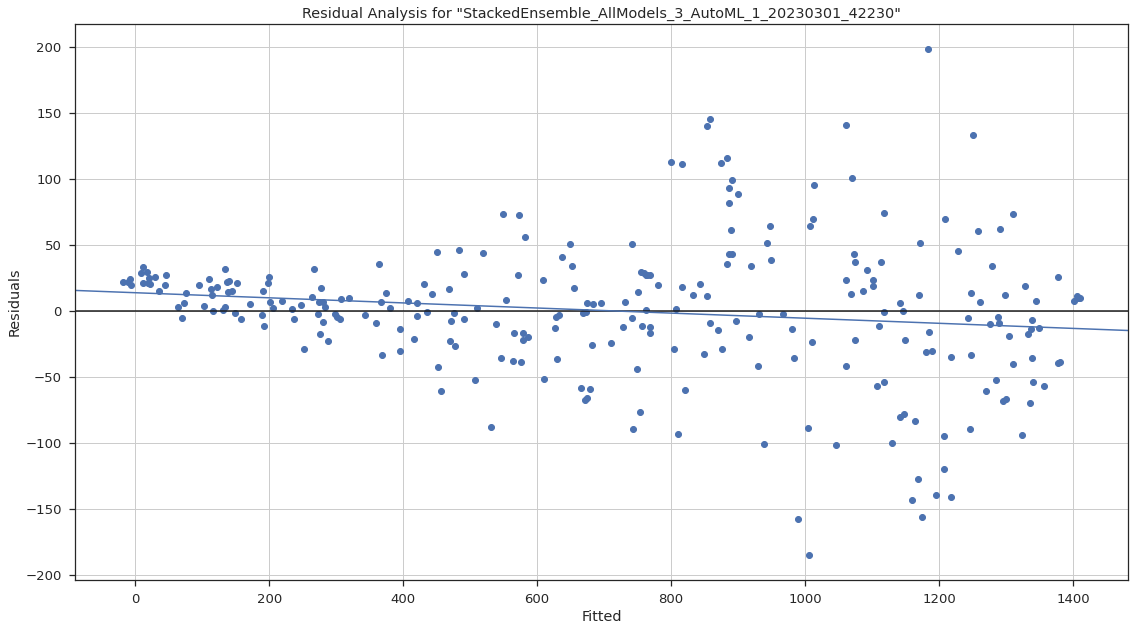

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

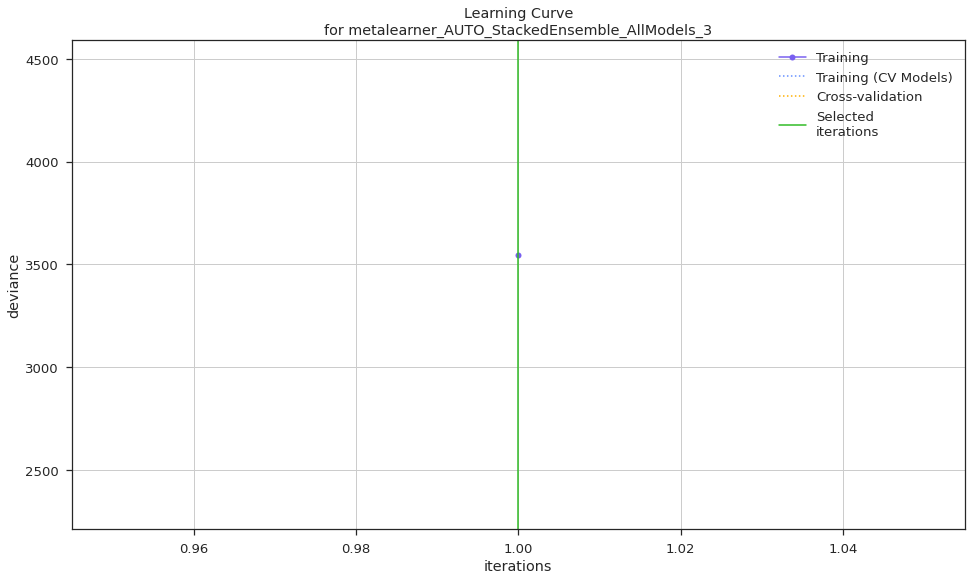

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

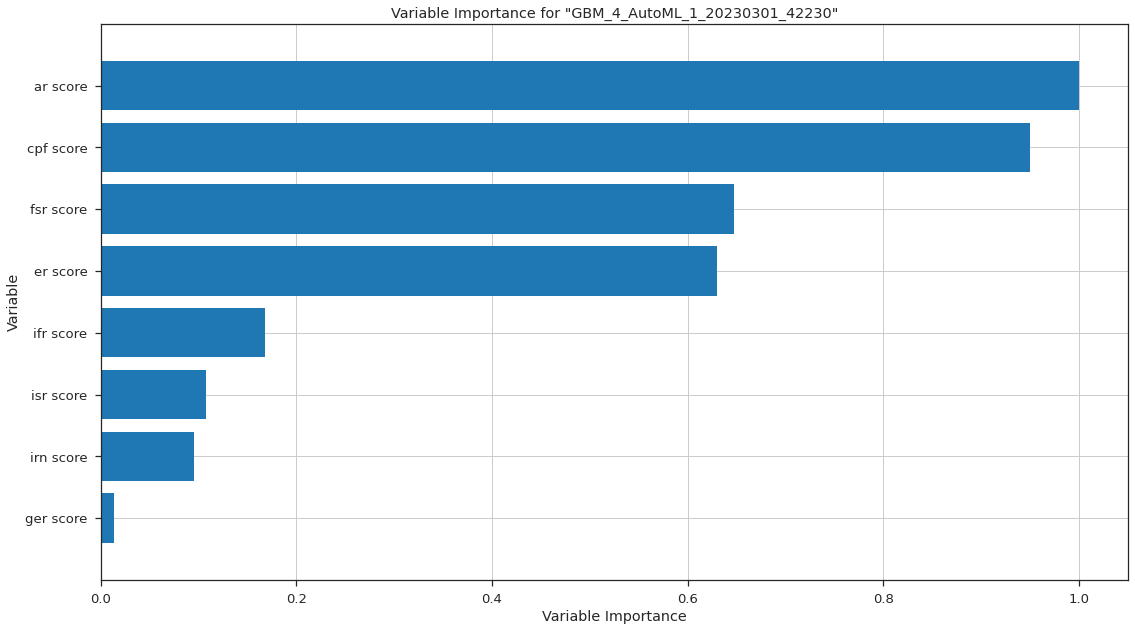

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

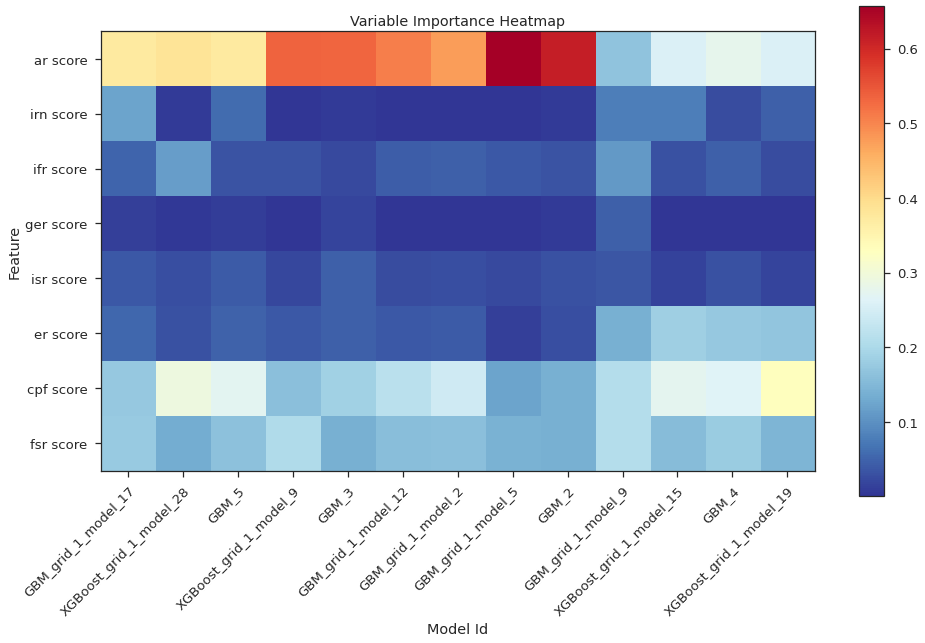

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

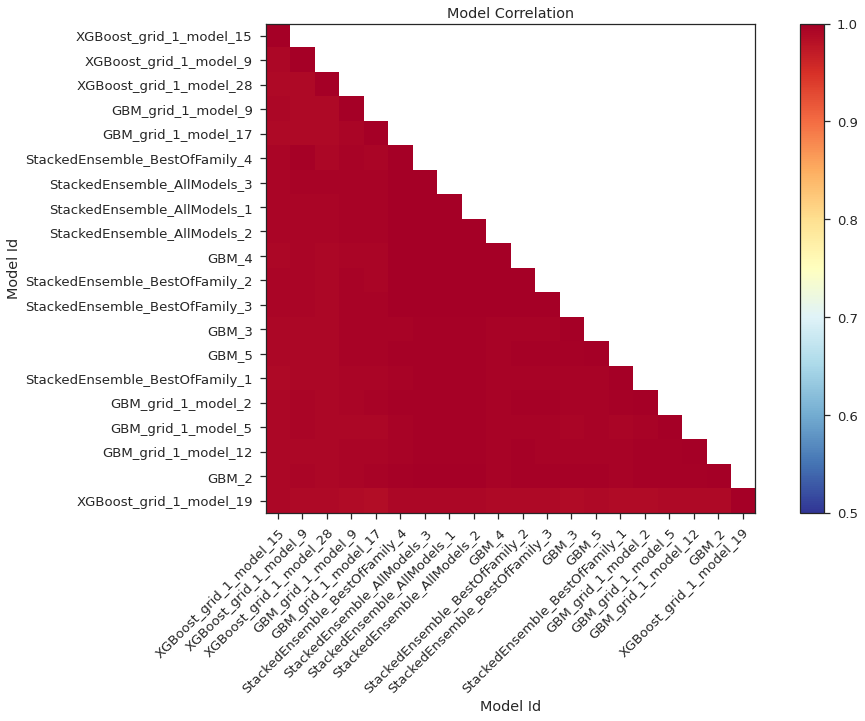

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

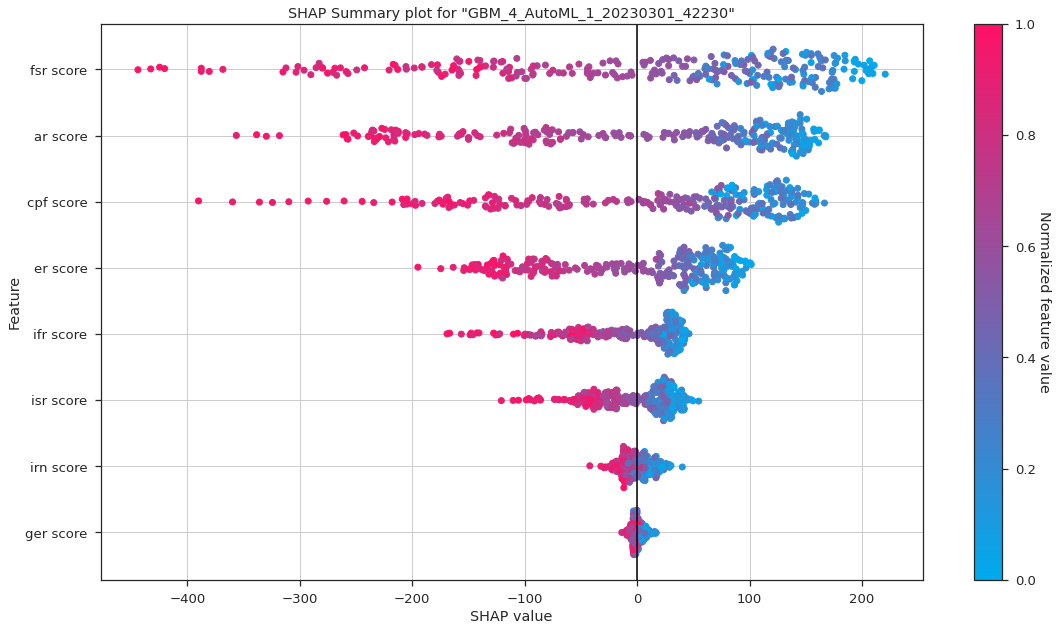

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

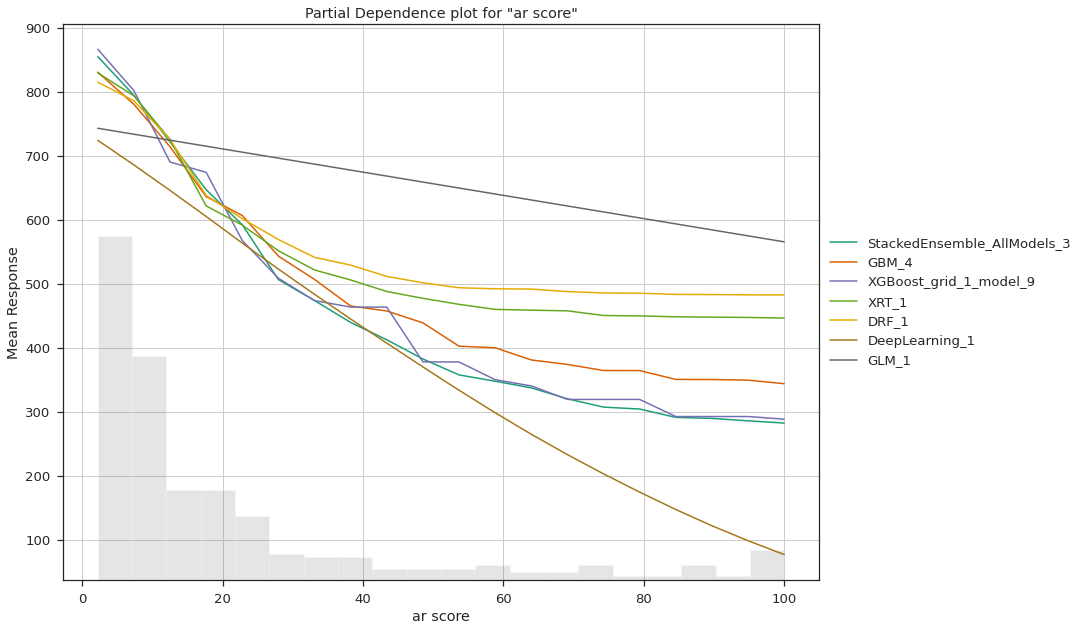

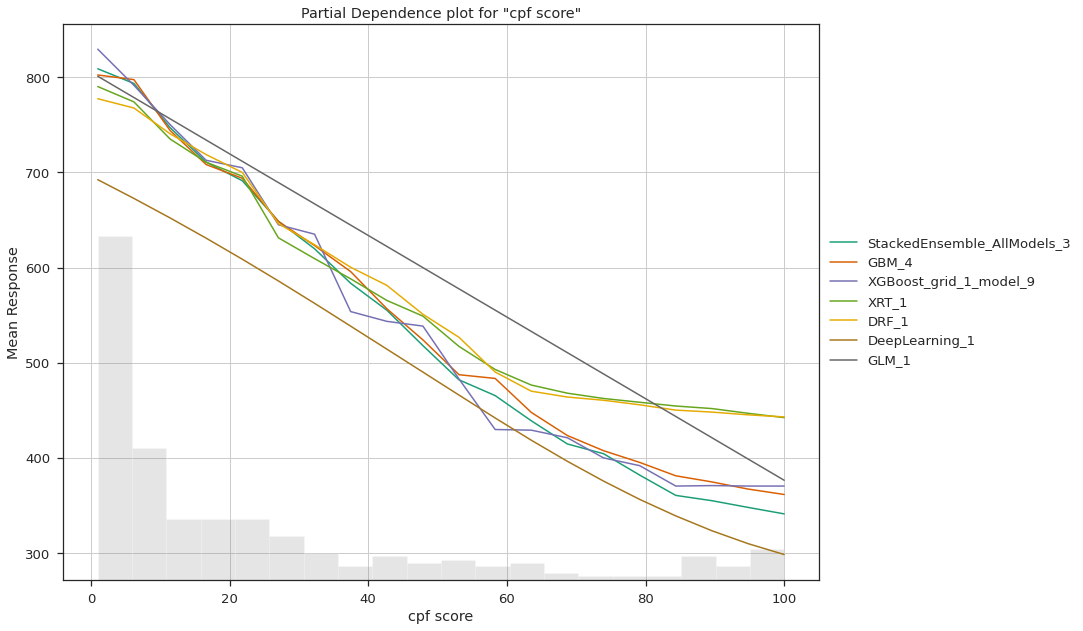

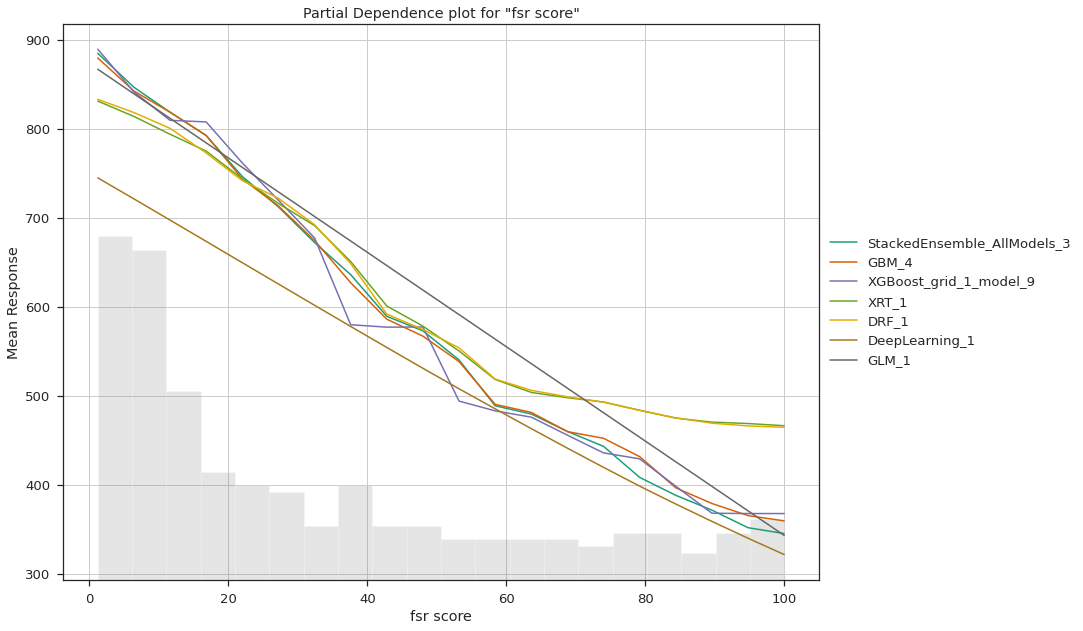

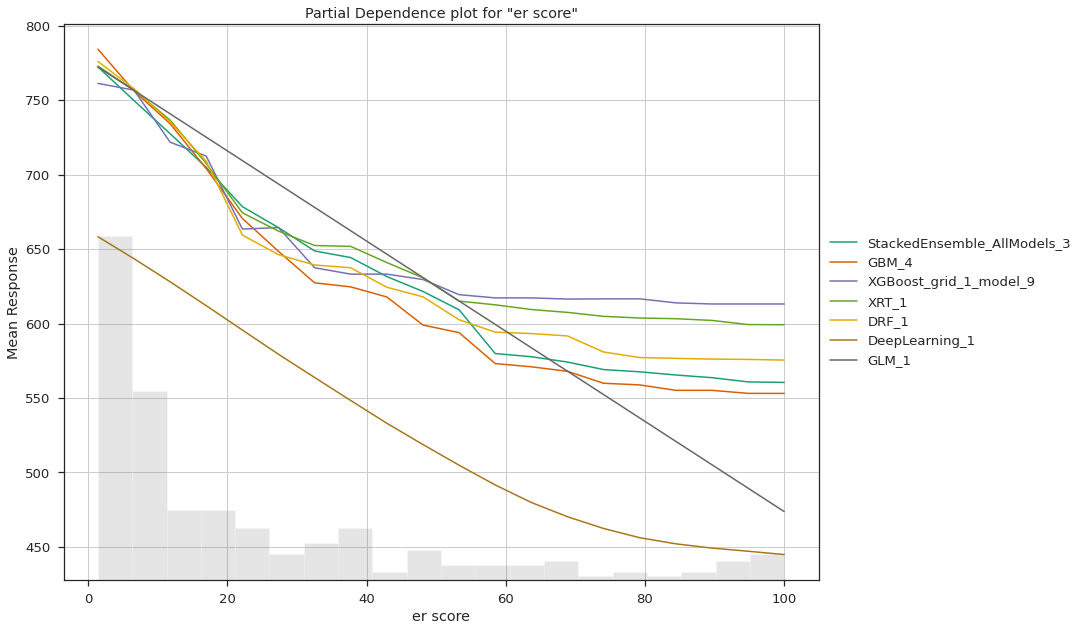

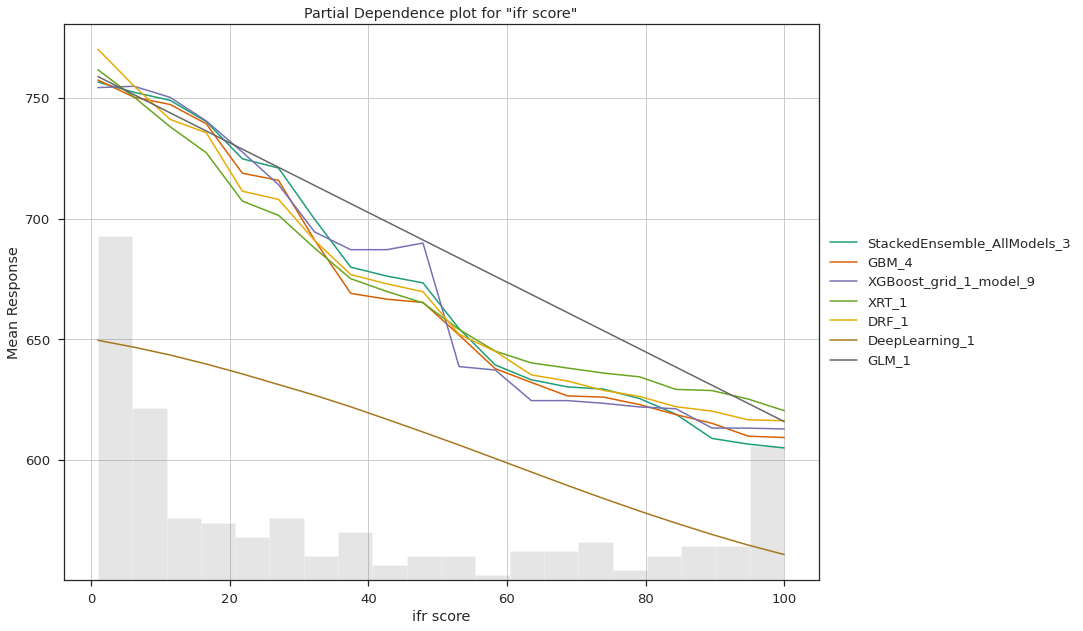

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

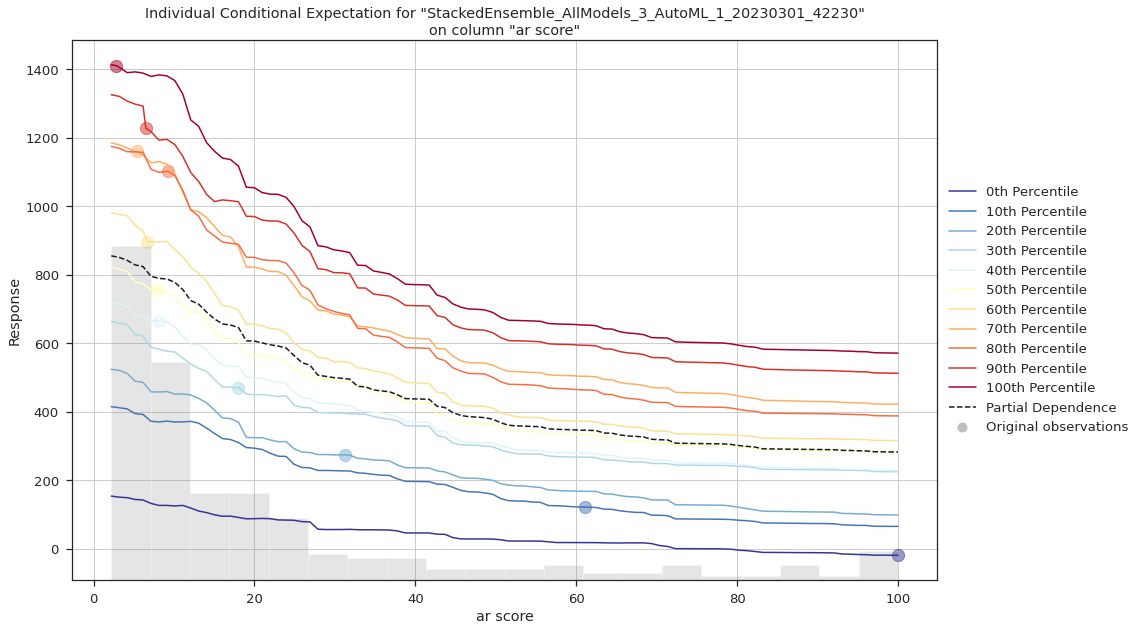

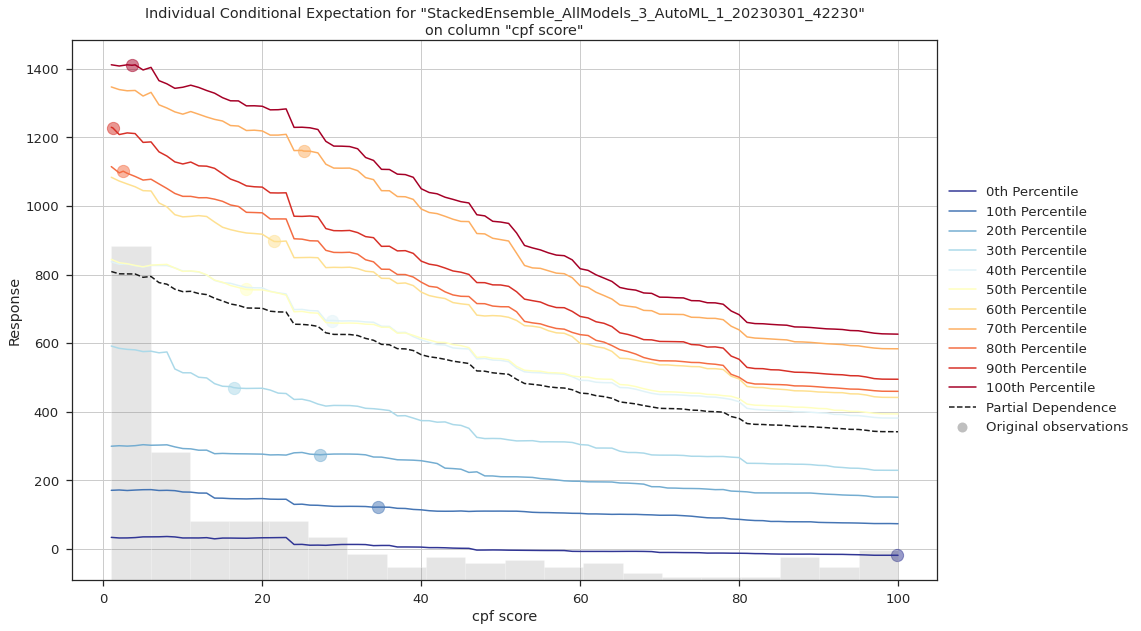

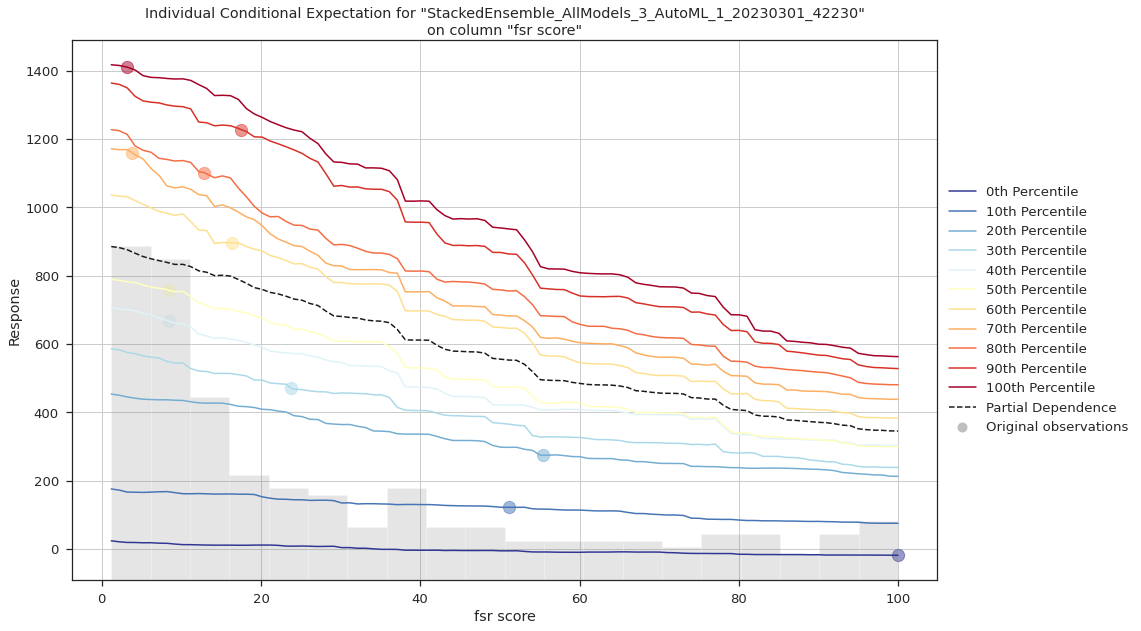

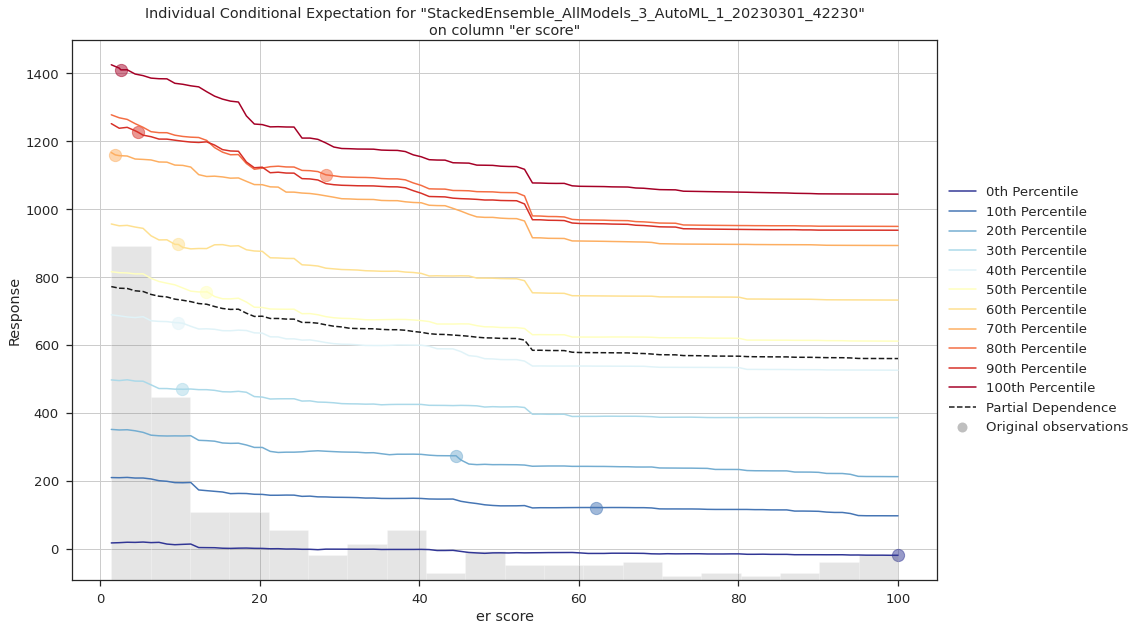

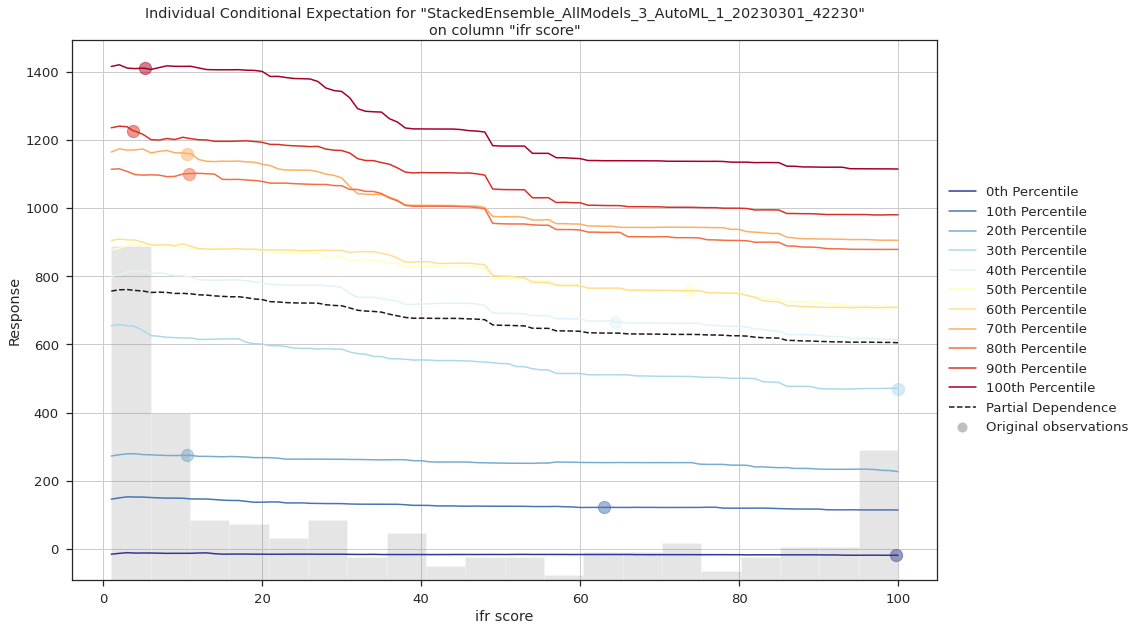

In [68]:
exa = aml.explain(df_test)

#### **Interpreting Best Model from AutoML**
### Residual Analysis

It can be observed that the residuals are normally distributed and the model is making accurate predictions. This is indicated by the random scatter of data points around the horizontal zero line, and the absence of any discernible pattern or trend in the residuals plot.Residuals signify that residuals don't have heteroscedasticity.

### SHAP Summary

The SHAP summary diagram provides valuable insights into the relative importance of the features in the model and their impact on the prediction. The importance of each feature is ranked based on its contribution to the prediction, with ar score being the most significant, followed by fsr score, and so on. The SHAP value axis indicates whether a feature has a positive or negative impact on the prediction, with values further away from zero indicating a stronger impact. The color of the dot represents the impact of the feature value on the prediction, with red indicating a high impact and blue indicating a low impact. In this model, a higher ar score and lower fsr score are associated with a higher Rank.

Further analysis of the distribution of SHAP values for the ar score feature reveals that extreme values at both ends of the spectrum have a significant effect on the Rank. The advantage of using SHAP analysis over traditional feature importance methods is that it allows us to visualize the impact of a feature at different values. This is especially useful for continuous or high-cardinality categorical variables, where traditional methods may overestimate the importance of certain values. Overall, the SHAP summary diagram provides a powerful tool for interpreting and understanding the behavior of complex machine learning models.

In conclusion, the SHAP summary diagram provides valuable insights into the relative importance of features and their impact on the prediction in a machine learning model. The visualization of the SHAP value axis and the color of the dots allows us to understand the direction and strength of the impact of each feature on the prediction. Further analysis of the distribution of SHAP values can reveal the effect of extreme values on the target variable. Compared to traditional feature importance methods, SHAP analysis provides a more accurate and interpretable way of understanding the behavior of complex models.


### Partial Dependence Plot (PDP)

A partial dependence plot (PDP) is a graphical tool that allows us to examine the marginal effect of a feature on the target variable. Essentially, it shows us how much the target variable changes as we vary the value of a single feature while holding all other features constant. This can be useful for interpretation purposes, as we can identify which features have the greatest impact on the target variable.

In the case of a dataset that ranks universities, we might be interested in which features are most important for determining the university's position in the rankings. For example, we might focus on two key variables: the ar score and the fsr score. By generating partial dependence plots for each of these variables, we can see how changes in these features impact the university's ranking.

Looking at the PDP for the ar score, we can see that as this feature increases, the mean response (i.e., the university's rank) also increases. This suggests that the range of values for the ar score might be an important factor in determining a university's ranking. Similarly, the PDP for the fsr score shows that as this feature increases, the mean response of quality also increases. Therefore, we can interpret this range as another deciding factor in a university's ranking.

The computation of partial dependence plots is straightforward. For a given feature value, the partial dependence function represents the average prediction if all data points are forced to assume that feature value. By examining these functions for different features, we can gain insights into the relationships between features and the target variable.


### ICE (Individual Conditional Expectation) Plot

The ICE plot and PDP plot are two methods used to understand the relationship between a feature and a model's output. While the PDP plot shows the average effect of a feature, it does not focus on a specific instance. On the other hand, the ICE plot addresses this issue by showing the effect of a feature on a particular instance. In other words, the ICE plot considers the outputs of all instances instead of an average value, providing a more detailed analysis of the relationship between a feature and a model's output.

To illustrate the difference between the two methods, let's consider the ar score and fsr score features. In the PDP plot, we observed that the rank of the university increases when the ar score and fsr score values increase, respectively. However, we may wonder if this trend holds true for every rank in the dataset. The ICE plot can help answer this question. By examining the ICE plot, we can see that while the rank of some universities remains unchanged when the ar score and fsr score values increase, the rank of other universities increases significantly. Therefore, the ICE plot provides a more nuanced understanding of the relationship between features and model output.

Furthermore, ICE plots are more intuitive than PDP plots. Each line in an ICE plot represents the predictions for one instance when we vary the feature of interest. Therefore, we can easily observe the effect of a feature on a specific instance, providing a more comprehensive analysis of the model's behavior. **bold text** **bold text**

In [69]:
import statsmodels.formula.api as smf

In [70]:
import h2o

pandas_df = h2o.as_list(h2o_df)

In [71]:
pandas_df.head()

Rank  ar score  er score  fsr score  cpf score  ifr score  isr score  \
0     1     100.0     100.0      100.0      100.0      100.0       90.0   
1     2     100.0     100.0      100.0       92.3      100.0       96.3   
2     3     100.0     100.0      100.0       99.9       99.8       60.3   
3     4     100.0     100.0      100.0       90.0       98.8       98.4   
4     5     100.0     100.0       99.4      100.0       76.9       66.9   

   irn score  ger score  
0       96.1      100.0  
1       99.5      100.0  
2       96.3      100.0  
3       99.9      100.0  
4      100.0      100.0

In [72]:
#Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

model = sm.OLS(newdata['Rank'],newdata[['ar score','er score', 'fsr score', 'cpf score', 'ifr score', 'isr score', 'irn score','ger score']]).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   Rank   R-squared (uncentered):                   0.490
Model:                            OLS   Adj. R-squared (uncentered):              0.487
Method:                 Least Squares   F-statistic:                              169.8
Date:                Wed, 01 Mar 2023   Prob (F-statistic):                   1.28e-200
Time:                        04:30:12   Log-Likelihood:                         -758.14
No. Observations:                1422   AIC:                                      1532.
Df Residuals:                    1414   BIC:                                      1574.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ar score      -0.0140      0.001    -13.390      0.000      -0.016      -0.012
er score       0.0026      0.001      2.974      0.003       0.001       0.004
fsr score      0.0015      0.000      3.824      0.000       0.001       0.002
cpf score     -0.0039      0.001     -7.322      0.000      -0.005      -0.003
ifr score     -0.0006      0.000     -1.160      0.246      -0.002       0.000
isr score     -0.0005      0.001     -0.869      0.385      -0.001       0.001
irn score      0.0101      0.000     24.888      0.000       0.009       0.011
ger score      0.0052      0.001     10.122      0.000       0.004       0.006
==============================================================================
Omnibus:                       84.689   Durbin-Watson:                   0.510
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.513
Skew:                           0.066   Prob(JB):                     8.71e-08
Kurtosis:                       2.271   Cond. No.                         11.6
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### **Interpreting OLS Regression:**

#### p Value
We will consider a significance value of 0.05 for determining the significance of our predictor variables which means if

p value is greater that 0.05 - feature is not significant for predicting the target variable
p value is less than 0.05 - feature is significant for predicting the target variable

1. The ar score has the p-value 0.0, which is lesser and hence it is a significant feature.
2. The er score has the p-value 0.003, which is lesser and hence it is a significant feature.
3. The fsr score has the p-value 0.0, which is lesser and hence it is a significant feature.
4. The cpf score has the p-value 0.0, which is lesser and hence it is a significant feature.
5. The ifr score has the p-value 0.246, which is greater and hence it is a not so significant feature.
6. The isr score has the p-value 0.385, which is greater and hence it is a significant feature.
7. The irn score has the p-value 0.0, which is lesser and hence it is a significant feature.
8. The ger score has the p-value 0, which is lesser and hence it is a significant feature.

#### Skew and Kurtosis

Skewness tells us the amount and direction of skew(Departure from the central axis) and Kurtosis tells us how tall and sharp the central peak is. The optimum value for these two measures is 0, in our case we have a value for Skew and Kurtosis as 0.066, 2.271 respectively.

#### Durbin-Watson

The Durbin-Watson test is a statistical test to detect auto-correlation in the residuals of a regression analysis. Its range is 0 to 4.

Value of 2 indicates that no auto correlation is detected
Value between 0 to 2 indicates that there is positive auto correlation detected
Value between 2 to 4 indicates that there is negatibe auto correlation detected
Our model has a DW score of 0.510 which could be interpreted as a positive auto-correlation in the residuals of regression.

#### Jarque-Bera Test

The JB test is known as the test of Normality, irrespective if the data has skew or kurtosis. If it is far from zero, it signals the data do not have a normal distribution. Our JB value is 32.513 which again re-inforces the interpretation we got from Skew and Kurtosis.



In [73]:
train, validate, test = np.split(
    pandas_df.sample(frac=1, random_state=42), [int(0.6 * len(df)), int(0.8 * len(df))]
)

train = h2o.H2OFrame(train)
validate = h2o.H2OFrame(validate)
test = h2o.H2OFrame(test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [74]:
gbm_parameters = {
    "learn_rate": [i * 0.01 for i in range(1, 11)],
    "max_depth": list(range(2, 11)),
    "sample_rate": [i * 0.1 for i in range(5, 11)],
    "col_sample_rate": [i * 0.1 for i in range(1, 11)],
}


In [75]:
search_criteria = {"strategy": "RandomDiscrete", "max_models": 36, "seed": 1}


In [76]:
import h2o
from h2o.grid.grid_search import H2OGridSearch
from h2o.estimators.gbm import H2OGradientBoostingEstimator


gbm_grid2 = H2OGridSearch(
    model=H2OGradientBoostingEstimator,
    grid_id="gbm_grid2",
    hyper_params=gbm_parameters,
    search_criteria=search_criteria,
)

In [79]:
gbm_params = {
    'learn_rate': [0.01, 0.02, 0.03],
    'max_depth': [2, 3, 4],
    'sample_rate': [0.7, 0.8, 0.9]
}

gbm_grid = H2OGridSearch(
    model=H2OGradientBoostingEstimator,
    grid_id='gbm_grid',
    hyper_params=gbm_params
)

gbm_grid.train(
    x=X, y=y, training_frame=train, validation_frame=validate, ntrees=100, seed=1
)

gbm_gridperf = gbm_grid.get_grid(sort_by="residual_deviance", decreasing=False)


gbm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%


In [83]:
gbm_gridperf


Hyper-Parameter Search Summary: ordered by increasing residual_deviance
     learn_rate    max_depth    sample_rate    model_ids          residual_deviance
---  ------------  -----------  -------------  -----------------  -------------------
     0.03          4.0          0.7            gbm_grid_model_9   7169.555487673185
     0.03          4.0          0.9            gbm_grid_model_27  7233.311480637197
     0.03          4.0          0.8            gbm_grid_model_18  7242.069921941536
     0.03          3.0          0.8            gbm_grid_model_15  9476.985345085588
     0.03          3.0          0.7            gbm_grid_model_6   9539.691201853777
     0.03          3.0          0.9            gbm_grid_model_24  9837.262339833
     0.02          4.0          0.8            gbm_grid_model_17  12587.55157091867
     0.02          4.0          0.7            gbm_grid_model_8   12657.783013732636
     0.02          4.0          0.9            gbm_grid_model_26  12898.509352471834
     0.03          2.0          0.7            gbm_grid_model_3   15825.76827512772
---  ---           ---          ---            ---                ---
     0.02          2.0          0.9            gbm_grid_model_20  27066.459042807364
     0.01          4.0          0.8            gbm_grid_model_16  36533.39959850078
     0.01          4.0          0.7            gbm_grid_model_7   36564.469538284844
     0.01          4.0          0.9            gbm_grid_model_25  36835.85834450601
     0.01          3.0          0.7            gbm_grid_model_4   43799.7076731326
     0.01          3.0          0.9            gbm_grid_model_22  43946.76795693584
     0.01          3.0          0.8            gbm_grid_model_13  44011.63079414936
     0.01          2.0          0.7            gbm_grid_model_1   56454.05072161609
     0.01          2.0          0.8            gbm_grid_model_10  56992.959754809555
     0.01          2.0          0.9            gbm_grid_model_19  57031.269996528994
[27 rows x 6 columns]

In [85]:
list_hyperparameters = []
for i in range(len(gbm_gridperf)):
    hyperparameters = gbm_gridperf.get_hyperparams_dict(i)
    list_hyperparameters.append(hyperparameters)


Hyperparameters: [learn_rate, max_depth, sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate]
Hyperparameters: [learn_rate

In [86]:
models = gbm_gridperf.models


In [88]:
list_residual_deviance = []
for i in range(len(gbm_gridperf)):
    model = models[i]
    performance_metrics = model.model_performance(validate)
    residual_deviance = performance_metrics.mean_residual_deviance()
    list_residual_deviance.append(residual_deviance)

In [89]:
for i in range(len(gbm_gridperf)):
    list_hyperparameters[i]["Residual_Deviance"] = list_residual_deviance[i]

In [90]:
hyperparameters_dataframe = pd.DataFrame(list_hyperparameters)


In [91]:
print(hyperparameters_dataframe)

    learn_rate  max_depth  sample_rate  Residual_Deviance
0         0.03          4          0.7        7169.555488
1         0.03          4          0.9        7233.311481
2         0.03          4          0.8        7242.069922
3         0.03          3          0.8        9476.985345
4         0.03          3          0.7        9539.691202
5         0.03          3          0.9        9837.262340
6         0.02          4          0.8       12587.551571
7         0.02          4          0.7       12657.783014
8         0.02          4          0.9       12898.509352
9         0.03          2          0.7       15825.768275
10        0.03          2          0.8       15946.671748
11        0.03          2          0.9       16533.883882
12        0.02          3          0.7       17098.757763
13        0.02          3          0.8       17321.240064
14        0.02          3          0.9       17324.762237
15        0.02          2          0.7       26675.478558
16        0.02

#### **Residual Deviance vs. Hyperparameters**

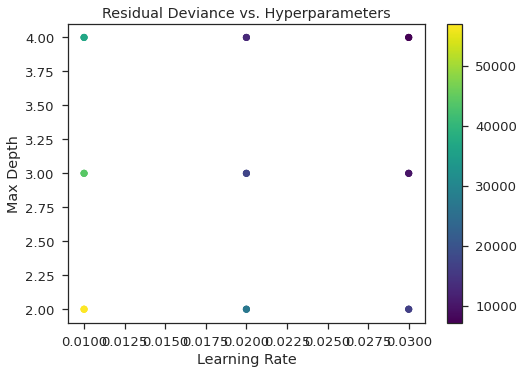

In [92]:
# Extracting hyperparameters and residual deviances from the dataframe
learning_rates = hyperparameters_dataframe["learn_rate"]
max_depths = hyperparameters_dataframe["max_depth"]
residual_deviances = hyperparameters_dataframe["Residual_Deviance"]

# Creating scatter plot
plt.scatter(learning_rates, max_depths, c=residual_deviances, cmap='viridis')
plt.colorbar()
plt.xlabel("Learning Rate")
plt.ylabel("Max Depth")
plt.title("Residual Deviance vs. Hyperparameters")

plt.show()


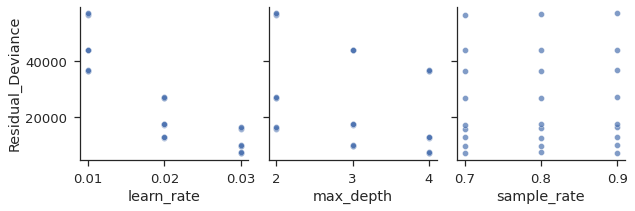

In [94]:
sns.pairplot(
hyperparameters_dataframe,
y_vars=["Residual_Deviance"],
x_vars=["learn_rate", "max_depth", "sample_rate"],
height=3,
diag_kws={"histtype": "step", "linewidth": 1, "alpha": 0.7},
plot_kws={"alpha": 0.7}
)

### **Hyperparameter Turning Analysis**

* The given dataset contains 36 observations and 5 variables: col_sample_rate, learn_rate, max_depth, sample_rate, and Residual_Deviance. The Residual Deviance is the measure of model error or the difference between the null deviance and the deviance of the fitted model. The values in the Residual Deviance column indicate the effectiveness of the model, where a lower value represents a better model fit. The other variables in the dataset are the hyperparameters used in the model, which are col_sample_rate, learn_rate, max_depth, and sample_rate.

* Each row in the dataset represents the hyperparameter values used in the model and their corresponding Residual Deviance. The values in the Residual Deviance column vary from 3945.68 to 56454.05, indicating that the effectiveness of the model varies widely based on the hyperparameters used.

* The hyperparameters used in the model are varied and cover a wide range. The col_sample_rate variable takes values between 0.1 to 1.0, the learn_rate variable takes values between 0.01 to 0.1, the max_depth variable takes values between 2 to 10, and the sample_rate variable takes values between 0.5 to 1.0. The dataset can be used to determine the optimal values for hyperparameters for the given model.

#### **Conclusion**
* Built a predictive model using H2O AutoML to predict the Rank of universities using certain attributes.
* From the analysis done above on the data set, The ar score and fsr score is the most important in calculating the university ranks. There is an evident multi - collinearity among lot of the independent variables.
* Studied the effects of Ridge and LASSO regularization on the GLM Model.
* Studied the importance of variable using SHAP summary.
* Performed the hyperparameterb tuning using Random Grid Search Method.

#### **Assignment Question/Answers**

Q1) Is the relationship significant?

A relationship is said to be statistically significant when the p value for the variables is less than 0.05.P value is probability of obtaining a result at least as extreme as the current one, assuming null hypothesis is true. A small p value depicts that there is very little similarity between the two groups and hence null hypothesis can be ignored. P-value was calculated by two ways for this model. 

* The ar score has the p-value 0.0, which is lesser and hence it is a significant feature.
* The er score has the p-value 0.003, which is lesser and hence it is a significant feature.
* The fsr score has the p-value 0.0, which is lesser and hence it is a significant feature.
* The cpf score has the p-value 0.0, which is lesser and hence it is a significant feature.
* The ifr score has the p-value 0.246, which is greater and hence it is not a significant feature.
* The isr score has the p-value 0.385, which is greater and hence it is not a significant feature.
* The irn score has the p-value 0.0, which is lesser and hence it is a significant feature.
* The ger score has the p-value 0, which is lesser and hence it is a significant feature.

So, it can be concluded that other that p-value for all the variables of dataset is less than 0.05. Hence for the chosen dataset it can be concluded that the relationship is significant.

Q2) Are any model assumptions violated? Assumptions for linear regression are:

Linear relationship- The graph for dependent and independent variable needs to be linear by keeping other variables constant. When target variable is plotted against all other independent variables, linear relation is observed for few of them. Hence this assumption is not violated.

Homoscedasticity which means normality of the error distribution - The plot for residuals should be normally distributed i.e., it should form a bell-curve shape. For this model the same is achieved.

No or little multicollinearity-This can be determined by correlation matrix. For this model some of the assumptions are violated. Multicollinearity exists between independent variables.

No autocorrelation can be determined with Durbin-Watson test. Values between 1.5 to 2.5 signifies no autocorrelation. Our model has a DW score of 0.510 which could be interpreted as a positive auto-correlation in the residuals of regression, therefore this assumption is not violated.


Q3) Is there any multicollinearity in the model? 

When one independent variable is related to another independent variable that is its highly correlated then multicollinearity exists in the model. It’s an issue as it undermines the statistical significance of an independent variable. Multicollinearity can be determined by computing correlation matrix or calculating VIF value of all variables. In correlation matrix a coefficient closer to +1 or -1 tells us that those two variables are highly correlated. For VIF values a value above 10 tells us that multicollinearity exists. In this model some variables had VIF value greater than 10 and p value was greater than 0.05. By dropping those columns and rechecking the values expected output was achieved. Currently high correlation exists between ar score and er score AND ifr score and isr score.

Q4) In the multivariate models are predictor variables independent of all the other predictor variables? 

Variables are said to be independent when there is no relation between them. To check this relation, correlation matrix can be used, or it can be observed from graphs too whether there is any pattern followed or not. When correlation matrix is computed for the model, it can be observed that independent variables are correlated to each other.

Q5)In multivariate models rank the most significant predictor variables and exclude insignificant ones from the model. 

From the variable importance plot, the most to least important variables are displayed. For my model, ar score and fsr score are most significant ones.

Q6) Does the model make sense? 

For a model to make sense it should follow all the assumptions and have p value, VIF between their respective ranges. RMSE should be as low as possible considering the minimum and maximum values of the target variable. Other than that, R2 too is 0.49 which is considered good in terms of accuracy. So overall the model makes sense. To increase the accuracy, some additional variables can be dropped depending on their importance. Furthermore, outliers can be removed or boosting, or ensemble model can be used.

Q7)Does regularization help? 

Regularization is a technique used for tuning the random noise function by adding an additional term to noise function. This additional term controls the excessively fluctuating function such that the coefficients don’t take extreme values and the prediction of target value for test data is not highly affected. The main use of Regularization is to minimize the validation loss and try to improve the accuracy of the model. For this model Ridge Regularization was used on training data. 

In the provided example, Ridge and Lasso are applied to the same dataset with the same regularization parameter (lambda = 0.3037) and the same number of predictors (8).

The performance metrics on the train data are better for Lasso than for Ridge (lower MSE, RMSE, and MAE, higher R-squared), suggesting that Lasso might be a better choice for this particular dataset and model. However, the cross-validation metrics show that the two models have similar performance.

In practice, the choice between Ridge and Lasso (or other regularization methods) depends on various factors, such as the dataset size, the number of predictors, the correlation among predictors, and the goal of the analysis.

Q8) Which independent variables are significant? 

Variables are significant when p-value is less than 0.05. For this model except for ifr score and isr score all other variables have p-value less than 0.05. So, it can be said that all variables are significant.

Q9) Which hyperparameters are important? 

To find best set a hyperparameter and combinations of interacting hyperparameters for a given dataset hyperparameters tuning is used. It objectively searches different values for model hyperparameters and chooses a subset that results in a model that achieves the best performance on a given dataset. 

The importance of hyperparameters depends on the specific machine learning model and task being performed. However, based on the provided data, some possible insights on the hyperparameters that might be important can be derived.

For example, in a tree-based model, the max_depth hyperparameter is usually important as it controls the depth of the decision tree, which in turn affects the model's complexity and ability to capture non-linear relationships.

The learn_rate hyperparameter is also important as it controls the step size of the optimization algorithm, and can affect the model's speed of convergence and ability to generalize.

The sample_rate and col_sample_rate hyperparameters control the subsampling of rows and columns respectively, which can help reduce overfitting and improve model's generalization performance.

Finally, the Residual_Deviance metric indicates the quality of the model fit, and can be used to compare the performance of different hyperparameter configurations.



# **Licences:**

Copyright (c) 2022 Shriya Pandita

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

# **References:**

Pandas 1.4 https://pandas.pydata.org/docs/getting_started/overview.html

Scipy.stats https://docs.scipy.org/doc/scipy/reference/stats.html

sklearn.simpleimputer https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html

QS University World Ranking dataset - https://www.kaggle.com/datasets/jkanthony/world-university-rankings-202223

H20.ai- https://docs.h2o.ai/

OLS Model- http://net-informations.com/ds/mla/ols.html

Linear Regression- https://www.analyticsvidhya.com/blog/2021/05/all-you-need-to-know-about-your-first-machine-learning-model-linear-regression/

Linear Regression Assumptions- https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/assumptions-of-linear-regression/